<a href="https://colab.research.google.com/github/Mobee33/Ames-dataset/blob/main/Mubeen_Ames_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **IMPORTING LIBRARIES AND DATA**

In [ ]:
# Importing the necessary Libraries
import pandas as pd # Importing the pandas package for data manipulation
import numpy as np # Importing the numpy package for numerical computations
import scipy.stats as stats # Importing the scipy.stats package for statistical analysis
import math # Importing math package for mathematical operations

# Visualization
import matplotlib.pyplot as plt # Importing the matplotlib package for plotting graphs
import seaborn as sns # Importing the seaborn package for data visualization

# Model Evaluation
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder from SciKit-Learn for encoding categorical features
from sklearn.model_selection import train_test_split # Importing necessary library for train-test split
from sklearn.preprocessing import MinMaxScaler # Importing MinMaxScaler from sklearn.preprocessing for feature scaling

# Machine Learning Model
from sklearn.linear_model import Lasso # Importing Lasso regression model for feature selection
import xgboost as xgb # Importing XGBoost library for boosting ensemble models
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree regression model
from sklearn.ensemble import RandomForestRegressor # Importing Random Forest regression model for ensemble learning
from sklearn.linear_model import ElasticNet # Importing Elastic Net regression model for feature selection

# Performance Metrics
from sklearn.metrics import mean_squared_error, r2_score # Importing mean squared error and R-squared score for regression evaluation

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # Importing RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV for hyperparameter tuning

In [ ]:
df=pd.read_csv(r'house_price.csv') #The file will now be successfully imported


# **2. EXPLORATORY DATA ANALYSIS**

##2.1 Data Exploration

In [ ]:
df.columns # This returns the column labels, hence giving us an overview of our dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.head() #This provides us with the first 5 rows in the dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.tail() #This provides us with the last 5 rows in the dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
#The info() function is used to obtain a condensed version of the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# The descibe() method is used to give a summary statistics of the dataframe df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
#The shape() function is used to determine the dimensions of the dataframe
df.shape

(1460, 81)

##2.2 Handling Null Values

In [ ]:
#This code calculates the number of missing values for each in the dataframe using the isnull() and sum() methods.
#The output shows the count of missing values for each column
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# The maximum number of rows that can be displayed in a DataFrame is set to the number of rows in df using the set_option() method
# - The value of the display.max_rows option is modified to match the number of rows in df
# - This ensures that all rows are displayed when the DataFrame is printed
pd.set_option('display.max_rows', df.shape[0])

In [ ]:
# The number of missing values in each column is computed using the isnull() method and sum() method, and the resulting Series is sorted in descending order of the count of missing values
# - This can be useful for visualizing and analyzing missing data in the DataFrame df
pd.DataFrame(df.isnull().sum().sort_values(ascending = False))

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [ ]:
# The following code is used to compute the number of columns that have missing values
len((df.columns[df.isnull().any()]))

19

In [ ]:
# Percentage of missing values is computed for each column in the df Dataframe using the isnull() and sum methods.
# - The result is stored as a Series called "null"
null = df.isnull().sum() / df.shape[0] * 100
# Columns with over 80% missing values are identified by filtering 'null' and creating a list of column names to be dropped, stored as 'col_to_drop'."
col_to_drop = null[null > 80].keys()
col_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Additional columns that can be dropped: FireplaceQu, Fireplaces, MasVnrType, MasVnrArea

In [ ]:
# Columns 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' are dropped from the DataFrame 'df' using the drop() method with the 'columns' parameter and stored in-place with the 'inplace' parameter set to True.
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [ ]:
len((df.columns[df.isnull().any()]))

15

In [ ]:
#This code returns a list of column names that contain at least one missing value in the DataFrame "df".
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [ ]:
df.shape

(1460, 77)

**Replacing null values**


In [ ]:
# Loop over each column in the dataframe
for col in df.columns:
    # Check if the column has any missing values
    if df[col].isnull().sum() > 0:
        # If the column is GarageYrBlt, fill the missing values using the bfill method
        if col == 'GarageYrBlt':
            df[col].fillna(method='bfill', inplace=True)
        # If the column datatype is float64 or int64, fill the missing values with the mean value of the column
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
            df[col].fillna(df[col].mean(), inplace=True)
        # If the column datatype is object, fill the missing values with the mode value of the column
        elif df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any more missing values in the dataframe
df.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [ ]:
#This code returns the total number of missing/null values in the entire DataFrame.
df.isnull().values.sum()

0



##2.3 Feature Engineering

*Combining Features*

In [ ]:
# Drop the ID column as it does not contribute to the model
df.drop('Id', axis=1, inplace=True)


In [ ]:
'''
The bathroom features are being combined into a single feature called "TotalBathrooms" to simplify the data and reduce redundancy.
This new feature will provide a better representation of the total number of bathrooms in a house and can potentially improve the performance of the model.
The individual bathroom features are then dropped from the dataset to avoid multicollinearity, which can negatively impact the accuracy of the model.
'''
# Create a new feature that combines the number of bathrooms in a house
df['TotalBathrooms'] = df['FullBath'] + df['BsmtFullBath'] + 0.5*df[['HalfBath', 'BsmtHalfBath']].sum(axis=1)

# Drop the individual bathroom features
df.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)


In [ ]:
'''
Combining 'GarageArea' and 'GarageCars' into a single feature 'GarageCapacity' can potentially improve the model's performance by capturing the relationship between the size of the garage and the number of cars it can fit.
By doing this, we eliminate redundant information and simplify the data.
'''
# Create a new feature for garage capacity by multiplying GarageArea and GarageCars
df['GarageCapacity'] = df['GarageArea'] * df['GarageCars']

# Drop the individual garage features
df.drop(['GarageArea', 'GarageCars'], axis=1, inplace=True)


In [ ]:
'''
Combining the square footage features into a single feature allows the model to capture the total living area of the house, rather than considering each individual space separately.
This can lead to more accurate predictions since the total area of the house can have a significant impact on the sale price.
Additionally, having fewer features can simplify the model and reduce the risk of overfitting.
Dropping the individual square footage features also removes any potential redundancy and multicollinearity between them, further improving the performance of the model.
'''
# Combine all the square footage features into a single feature
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# Drop the individual square footage features
df.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis=1, inplace=True)

In [ ]:
'''
By adding up the overall quality and overall condition scores of a house, we obtain a more complete and informative overall score that reflects both the quality and condition of the house.
Dropping the original individual features reduces redundancy and can help improve the model's performance by reducing the number of input features.
'''
# Combine the overall quality and condition features into a single feature
df['OverallScore'] = df['OverallQual'] + df['OverallCond']

# Drop the individual features
df.drop(['OverallQual', 'OverallCond'], axis=1, inplace=True)


In [ ]:
'''
Subtracting the year the house was built from the year it was sold gives us the age of the house at the time of sale.
This feature could be important in predicting house prices as older houses may have more wear and tear and may require more maintenance, potentially decreasing their value.
'''
# Create a new feature for the age of the house at the time of sale
df['Age'] = df['YrSold'] - df['YearBuilt']

# Drop the 'YearBuilt' and 'YrSold' features
df.drop(['YearBuilt', 'YrSold'], axis=1, inplace=True)


In [ ]:
'''
The basement quality and condition features have been combined into a single feature, BsmtOverall, to provide a more accurate representation of the overall basement quality.
Dropping the individual columns helps to reduce the number of features and simplify the dataset.
'''
# Define a mapping of values to their numeric counterparts
bsmt_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} # ---> Label Encoding

# Replace the values in 'BsmtQual' and 'BsmtCond' with their numeric equivalents
df['BsmtQual'] = df['BsmtQual'].replace(bsmt_map)
df['BsmtCond'] = df['BsmtCond'].replace(bsmt_map)

# Create a new feature named 'BsmtOverall' that is the sum of 'BsmtQual' and 'BsmtCond'
df['BsmtOverall'] = df['BsmtQual'] + df['BsmtCond']

# Drop the individual basement columns
df.drop(['BsmtQual', 'BsmtCond'], axis=1, inplace=True)

In [ ]:
'''
The GarageQual and GarageCond features have been combined into a single feature named GarageOverall using the same approach as for BsmtOverall.
This helps to provide a more accurate representation of the overall garage quality while reducing the number of features in the dataset.
'''
# Define a mapping of values to their numeric counterparts
garage_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

# Replace the values in 'GarageQual' and 'GarageCond' with their numeric equivalents
df['GarageQual'] = df['GarageQual'].replace(garage_map)
df['GarageCond'] = df['GarageCond'].replace(garage_map)


# Create a new feature named 'GarageOverall' that is the sum of 'GarageQual' and 'GarageCond'
df['GarageOverall'] = df['GarageQual'] + df['GarageCond']

# Drop the individual garage columns
df.drop(['GarageQual', 'GarageCond'], axis=1, inplace=True)

In [ ]:
'''
We combined the ExterQual and ExterCond features into a new feature called ExterOverall by mapping their categorical values to their respective numeric values and then adding them together.
This allows us to capture the overall condition and quality of the exterior of each house as a single feature, which could be more informative and useful in predicting the sale price.
'''
# Define a mapping of values to their numeric counterparts
exter_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

# Replace the values in 'ExterQual' and 'ExterCond' with their numeric equivalents
df['ExterQual'] = df['ExterQual'].replace(exter_map)
df['ExterCond'] = df['ExterCond'].replace(exter_map)

# Create a new feature named 'ExterOverall' that is the sum of 'ExterQual' and 'ExterCond'
df['ExterOverall'] = df['ExterQual'] + df['ExterCond']

# Drop the individual exterior columns
df.drop(['ExterQual', 'ExterCond'], axis=1, inplace=True)


In [ ]:
'''
We create a new feature called TotalPorchArea by adding up the square footage of each porch feature: OpenPorchSF, EnclosedPorch, 3SsnPorch, and ScreenPorch.
We then drop the individual porch features since we have consolidated them into one feature.
'''
# Create a new feature that combines porch area
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Drop the individual porch features
df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)


In [ ]:
'''
We are combining the 'FireplaceQu' and 'Fireplaces' columns to create a new feature called 'FireplaceScore' which represents the overall quality and quantity of fireplaces in the house.
The 'FireplaceQu' column rates the quality of the fireplace, and the 'Fireplaces' column records the number of fireplaces in the house.
By adding the two columns, we get a combined score that takes into account both the quality and quantity of fireplaces.
'''
# Define a mapping of values to their numeric counterparts
fp_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

# Replace the values in 'FireplaceQu' with their numeric equivalents
df['FireplaceQu'] = df['FireplaceQu'].replace(fp_map)

# Create a new feature named 'FireplaceScore' that is the product of 'FireplaceQu' and 'Fireplaces'
df['FireplaceScore'] = df['FireplaceQu'] * df['Fireplaces']

# Drop the individual basement columns
df.drop(['FireplaceQu', 'Fireplaces'], axis=1, inplace=True)


In [ ]:
'''
Combining the features 'BsmtFinType1' and 'BsmtFinSF1' into a new feature 'BsmtFinScore' can potentially improve our model by capturing the overall quality of the basement finished area.
This new feature may have a stronger correlation with the target variable than the individual features, leading to a better predictive performance of the model.
'''
# Define a mapping of values to their numeric counterparts
bsmtfin_map = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0}

# Replace the values in 'BsmtFinType1' with their numeric equivalents
df['BsmtFinType1'] = df['BsmtFinType1'].replace(bsmtfin_map)

# Create a new feature named 'BsmtFinScore' that is the product of 'BsmtFinType1' and 'BsmtFinSF1'
df['BsmtFinScore'] = df['BsmtFinType1'] * df['BsmtFinSF1']

# Drop the individual basement columns
df.drop(['BsmtFinType1', 'BsmtFinSF1'], axis=1, inplace=True)

In [ ]:
'''
Combining the features 'BsmtFinType2' and 'BsmtFinSF2' into a new feature 'BsmtFin2Score' can potentially improve our model by capturing the overall quality of the basement finished area.
This new feature may have a stronger correlation with the target variable than the individual features, leading to a better predictive performance of the model.
'''
# Define a mapping of values to their numeric counterparts
bsmtfin2_map = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0}

# Replace the values in 'BsmtFinType2' with their numeric equivalents
df['BsmtFinType2'] = df['BsmtFinType2'].replace(bsmtfin2_map)

# Create a new feature named 'BsmtFin2Score' that is the product of 'BsmtFinType2' and 'BsmtFinSF2'
df['BsmtFin2Score'] = df['BsmtFinType2'] * df['BsmtFinSF2']

# Drop the individual basement columns
df.drop(['BsmtFinType2', 'BsmtFinSF2'], axis=1, inplace=True)

In [ ]:
df.shape

(1460, 59)

##2.4 Checking for Duplicates

In [ ]:
#Checking for the total number of duplicates
df.duplicated().sum()

0

##2.5 Handling Zero Values

**Checking for zero values**

In [ ]:
def zero_count():
    # Count number of zeros in all columns of Dataframe
    zero_counts = {}
    for column_name in df.columns:
        column = df[column_name]
        # Get the count of Zeros in column
        count = (column == 0).sum()
        zero_counts[column_name] = count

    # Sort the columns based on number of zeros in descending order
    sorted_columns = sorted(zero_counts.items(), key=lambda x: x[1], reverse=True)

    # Print the counts of zeros in each column in descending order
    for column_name, count in sorted_columns:
        print('Count of zeros in column ', column_name, ' is : ', count)

zero_count()


Count of zeros in column  PoolArea  is :  1453
Count of zeros in column  LowQualFinSF  is :  1434
Count of zeros in column  MiscVal  is :  1408
Count of zeros in column  BsmtFin2Score  is :  1294
Count of zeros in column  MasVnrArea  is :  861
Count of zeros in column  WoodDeckSF  is :  761
Count of zeros in column  FireplaceScore  is :  690
Count of zeros in column  BsmtFinScore  is :  467
Count of zeros in column  TotalPorchArea  is :  458
Count of zeros in column  BsmtUnfSF  is :  118
Count of zeros in column  GarageCapacity  is :  81
Count of zeros in column  Age  is :  64
Count of zeros in column  BedroomAbvGr  is :  6
Count of zeros in column  KitchenAbvGr  is :  1
Count of zeros in column  MSSubClass  is :  0
Count of zeros in column  MSZoning  is :  0
Count of zeros in column  LotFrontage  is :  0
Count of zeros in column  LotArea  is :  0
Count of zeros in column  Street  is :  0
Count of zeros in column  LotShape  is :  0
Count of zeros in column  LandContour  is :  0
Count o

*Creating a list with zero values in descending order*




In [ ]:
#The code below creates a list of columns with zero values in descending order

def count_zeros(df):
    zero_counts = {}
    for column_name in df.columns:
        column = df[column_name]
        count = (column == 0).sum()
        zero_counts[column_name] = count
    return zero_counts

# Call count_zeros function to get the zero counts for each column
zero_counts = count_zeros(df)

# Sort the columns based on total number of zero values in descending order
sorted_columns = sorted(zero_counts.items(), key=lambda x: x[1], reverse=True)

# Create a list of columns that have zero values
columns_with_zeros = [column_name for column_name, count in sorted_columns if count > 0]

print(columns_with_zeros)

['PoolArea', 'LowQualFinSF', 'MiscVal', 'BsmtFin2Score', 'MasVnrArea', 'WoodDeckSF', 'FireplaceScore', 'BsmtFinScore', 'TotalPorchArea', 'BsmtUnfSF', 'GarageCapacity', 'Age', 'BedroomAbvGr', 'KitchenAbvGr']


*Checking the correlation of the list against Saleprice(Target Variable)*

In [ ]:
# Create a new dataframe with only the relevant columns
df_relevant = df[columns_with_zeros + ['SalePrice']]

# Calculate the correlation matrix
corr_matrix = df_relevant.corr()

# Display the correlation matrix for SalePrice
print(corr_matrix['SalePrice'])

PoolArea          0.092404
LowQualFinSF     -0.025606
MiscVal          -0.021190
BsmtFin2Score     0.010995
MasVnrArea        0.475241
WoodDeckSF        0.324413
FireplaceScore    0.510043
BsmtFinScore      0.465987
TotalPorchArea    0.195739
BsmtUnfSF         0.214479
GarageCapacity    0.680058
Age              -0.523350
BedroomAbvGr      0.168213
KitchenAbvGr     -0.135907
SalePrice         1.000000
Name: SalePrice, dtype: float64


*Separating the list into lower correlation and higher correlation*

In [ ]:
# Get the columns with correlation less than 0.1
low_corr_columns = []
for column in corr_matrix.columns:
    if column != 'SalePrice' and corr_matrix['SalePrice'][column] < 0.1:
        low_corr_columns.append(column)

# Print the list of columns with correlation less than 0.1
print('Columns with correlation less than 0.1:', low_corr_columns)

Columns with correlation less than 0.1: ['PoolArea', 'LowQualFinSF', 'MiscVal', 'BsmtFin2Score', 'Age', 'KitchenAbvGr']


In [ ]:
# Get the columns with correlation greater than 0.1
higher_corr_columns = []
for column in corr_matrix.columns:
    if column != 'SalePrice' and corr_matrix['SalePrice'][column] >= 0.1:
        higher_corr_columns.append(column)

# Print the list of columns with correlation greater than 0.1
print('Columns with correlation greater than 0.1:', higher_corr_columns)

Columns with correlation greater than 0.1: ['MasVnrArea', 'WoodDeckSF', 'FireplaceScore', 'BsmtFinScore', 'TotalPorchArea', 'BsmtUnfSF', 'GarageCapacity', 'BedroomAbvGr']


*Dropping the columns with lower correlation*




In [ ]:
# The code drops several columns from the DataFrame df. The columns being dropped are 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch', 'HalfBath', and 'BsmtFullBath'.
df.drop(columns=['PoolArea', 'LowQualFinSF', 'MiscVal', 'BsmtFin2Score', 'KitchenAbvGr' ] , inplace=True)
zero_count()

Count of zeros in column  MasVnrArea  is :  861
Count of zeros in column  WoodDeckSF  is :  761
Count of zeros in column  FireplaceScore  is :  690
Count of zeros in column  BsmtFinScore  is :  467
Count of zeros in column  TotalPorchArea  is :  458
Count of zeros in column  BsmtUnfSF  is :  118
Count of zeros in column  GarageCapacity  is :  81
Count of zeros in column  Age  is :  64
Count of zeros in column  BedroomAbvGr  is :  6
Count of zeros in column  MSSubClass  is :  0
Count of zeros in column  MSZoning  is :  0
Count of zeros in column  LotFrontage  is :  0
Count of zeros in column  LotArea  is :  0
Count of zeros in column  Street  is :  0
Count of zeros in column  LotShape  is :  0
Count of zeros in column  LandContour  is :  0
Count of zeros in column  Utilities  is :  0
Count of zeros in column  LotConfig  is :  0
Count of zeros in column  LandSlope  is :  0
Count of zeros in column  Neighborhood  is :  0
Count of zeros in column  Condition1  is :  0
Count of zeros in colu

In [ ]:
# # Create a list of columns to replace zero values with their mean
# columns_to_replace = ['BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFinSF1']

# # Replace zero values in the selected columns with their mean value
# for column in columns_to_replace:
#     mean_value = df[column].mean()
#     df[column].replace(to_replace=0, value=mean_value, inplace=True)

# zero_count()


In [ ]:
df.shape

(1460, 54)

##2.6 Dealing with outliers

In [ ]:
# We define a list of percentile values to verify
quants = [0.01, 0.02, 0.25, 0.5, 0.75, 0.98, 0.99]
q = df.quantile(quants)
column_headers = list(q.columns)
print(q)

      MSSubClass  LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtUnfSF  \
0.01        20.0    21.000000   1680.00        1950.0        0.00       0.00   
0.02        20.0    24.000000   2124.74        1950.0        0.00       0.00   
0.25        20.0    60.000000   7553.50        1967.0        0.00     223.00   
0.50        50.0    70.049958   9478.50        1994.0        0.00     477.50   
0.75        70.0    79.000000  11601.50        2004.0      164.25     808.00   
0.98       188.2   120.820000  25251.62        2008.0      650.82    1678.20   
0.99       190.0   137.410000  37567.64        2009.0      791.28    1797.05   

      GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  ...  GarageCapacity  \
0.01     692.18           1.0          3.00       1916.0  ...            0.00   
0.02     768.00           1.0          4.00       1920.0  ...            0.00   
0.25    1129.50           2.0          5.00       1961.0  ...          336.00   
0.50    1464.00           3.0      

*Checking outliers with Robust Z-score*

In [ ]:
# Define a function named RZscore_outlier to find outliers using modified Z-score method
def RZscore_outlier(df, column_name):

    # Create an empty list to store the outliers
    out=[]

    # Get the column from the dataframe
    col = df[column_name]

    # Calculate the median of the column
    med = np.median(col)

    # Calculate the median absolute deviation of the column
    ma = stats.median_abs_deviation(col)

    # Check if the median absolute deviation is zero, which can cause division by zero error
    if ma == 0:
        print("Median absolute deviation is zero in column ", column_name, ", which may indicate that there are no outliers. However, this can cause an error when calculating the modified Z-score.")
        return

    # Loop through each value in the column
    for i in col:

        # Calculate the modified Z-score for the value
        z = (0.6745*(i-med))/ (np.median(ma))

        # If the absolute value of the modified Z-score is greater than 3,
        # consider it as an outlier and append it to the 'out' list
        if np.abs(z) > 3:
            out.append(i)

    # Print the column name and the list of outliers for that column
    if len(out) > 0:
        print("Outliers in column ", column_name, ":", out)
    else:
        print("No outliers found in column ", column_name)


# Loop through each column in the list of column headers
for column in column_headers:

    # Call the RZscore_outlier function for the column in the dataframe
    RZscore_outlier(df, column)

Outliers in column  MSSubClass : [190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
Outliers in column  LotFrontage : [115.0, 24.0, 21.0, 121.0, 122.0, 24.0, 120.0, 134.0, 141.0, 24.0, 24.0, 174.0, 21.0, 21.0, 174.0, 21.0, 21.0, 120.0, 129.0, 140.0, 120.0, 118.0, 116.0, 150.0, 21.0, 130.0, 21.0, 24.0, 21.0, 137.0, 21.0, 21.0, 24.0, 130.0, 24.0, 21.0, 21.0, 21.0, 120.0, 24.0, 24.0, 144.0, 24.0, 21.0, 128.0, 116.0, 149.0, 21.0, 313.0, 24.0, 24.0, 24.0, 122.0, 130.0, 121.0, 21.0, 115.0, 21.0, 21.0, 21.0, 120.0, 24.0, 24.0, 24.0, 168.0, 182.0, 134.0, 24.0, 120.0, 118.0, 138.0, 160.0, 24.0, 152.0, 21.0, 124.0, 21.0, 313.0, 24.0, 153.0, 120.0, 129.0, 124.0, 21.0, 21.0]
Outliers in column  LotArea : [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095

*Plotting histograms to better visualize outliers*

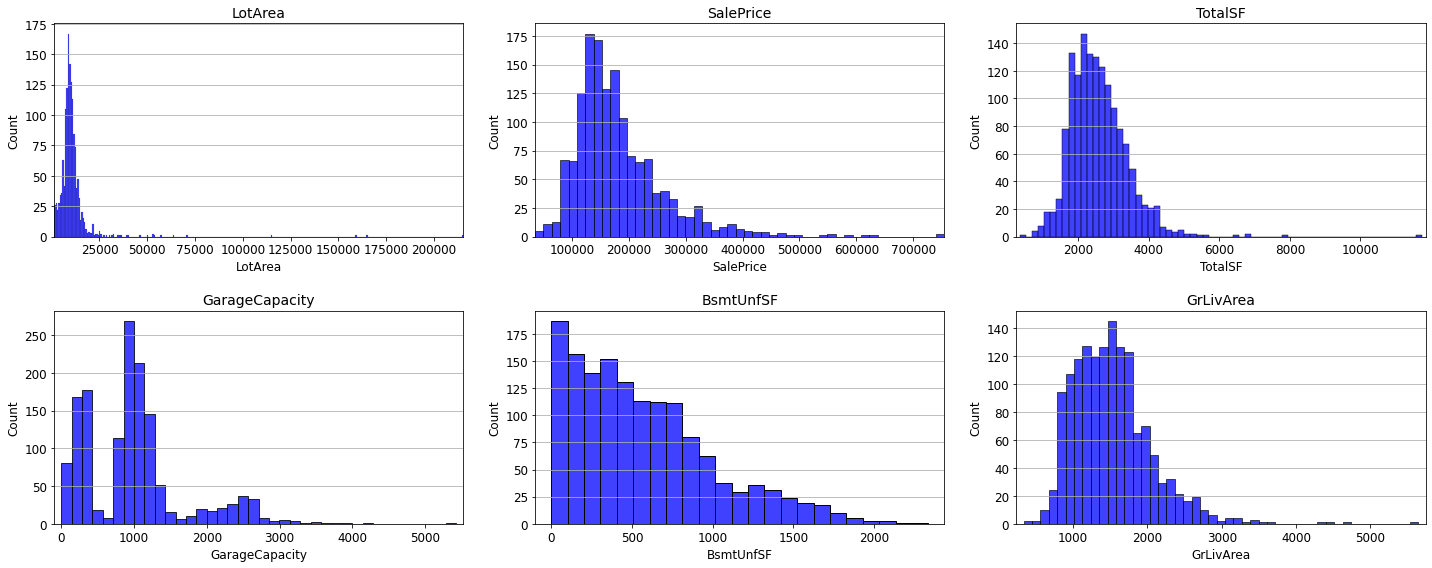

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))  # Create a figure with 2 rows and 3 columns, and a size of 20x8
features = ['LotArea', 'SalePrice', 'TotalSF', 'GarageCapacity', 'BsmtUnfSF', 'GrLivArea' ]  # Define the features to plot

for i, feature in enumerate(features):   # Loop through each feature in the list of features
    row = i // 3   # Calculate the row position of the current plot
    col = i % 3    # Calculate the column position of the current plot

    # Plot a histogram of the current feature on the specified axis
    sns.histplot(df[feature], ax=axes[row, col], kde=False, color='blue', edgecolor='black')

    # Set the title of the current plot to the name of the current feature
    axes[row, col].set_title(feature, fontsize=14)

    # Set the x-axis label to the name of the current feature
    axes[row, col].set_xlabel(feature, fontsize=12)

    # Set the y-axis label to "Count"
    axes[row, col].set_ylabel("Count", fontsize=12)

    # Set the x-axis limits of the current plot to the minimum and maximum values of the given feature in the dataframe plus a buffer of 100
    axes[row, col].set_xlim([df[feature].min() - 100, df[feature].max() + 100])

    # Increase the font size of the tick labels on both axes
    axes[row, col].tick_params(axis='both', labelsize=12)

    # Show grid lines only along the y-axis
    axes[row, col].grid(axis='y')

# Adjust the spacing between subplots to make them fit nicely
plt.tight_layout(h_pad=2, w_pad=2.5)

# Show the plot
plt.show()



# **3. DATA VISUALIZATION**

##3.1 Univariate Analysis - Analyzing numerical and categorical values

**Separating the variables into categorical and numerical**




In [ ]:
# Empty lists to hold categorical and numerical columns
categorical_cols = []
numerical_cols = []

# Loop over each column in the dataframe
for col in df.columns:
    # Check if the column has datatype of either int64 or float64
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
          numerical_cols.append(col)
    # Check if the column has datatype object
    elif df[col].dtype == 'object':
        categorical_cols.append(col)

# Print the lists of categorical and numerical columns
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
# OverallCond, OverallQual may be changed to numerical using replace function

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'WoodDeckSF', 'MoSold', 'SalePrice', 'TotalBathrooms', 'GarageCapacity', 'TotalSF', 'OverallScore', 'Age', 'BsmtOverall', 'GarageOverall', 'ExterOverall', 'TotalPorchArea', 'FireplaceScore', 'BsmtFinScore']


**Analysis of Categorical Variables**

In [ ]:
def cat_summary(dataframe, col_name, plot=True):
    plt.figure(figsize=(18, 8))   # set figure size to be 18 x 8 inches
    counts = dataframe[col_name].value_counts()
    ratios = 100 * counts / len(dataframe)

    # Print summary table
    print(f"{col_name.capitalize()} Summary Table")
    summary = pd.DataFrame({"Count": counts, "Ratio": ratios.round(2)})
    print(summary.to_string())
    print("########################################## \n")

    # plot the count graph if plot=True
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("{} Count Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

Mszoning Summary Table
         Count  Ratio
RL        1151  78.84
RM         218  14.93
FV          65   4.45
RH          16   1.10
C (all)     10   0.68
########################################## 



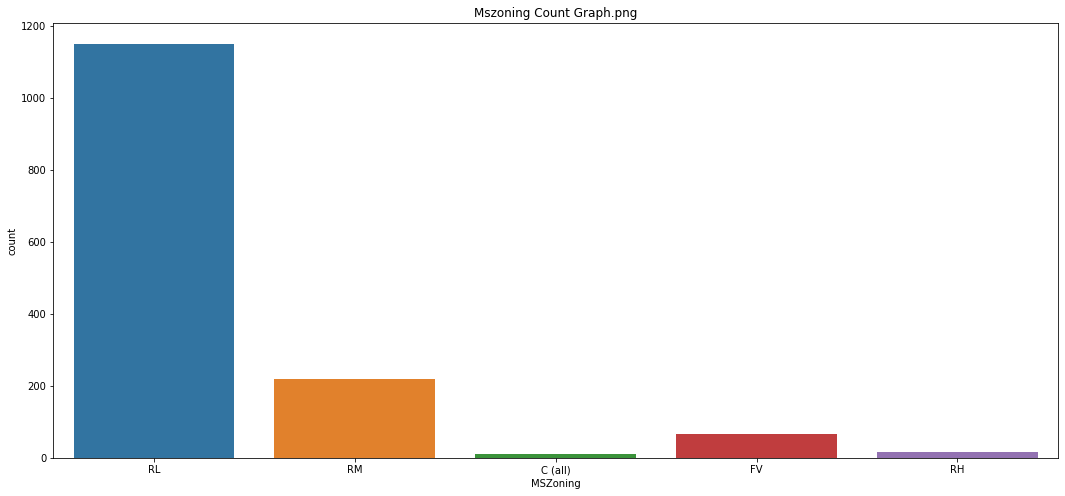

Street Summary Table
      Count  Ratio
Pave   1454  99.59
Grvl      6   0.41
########################################## 



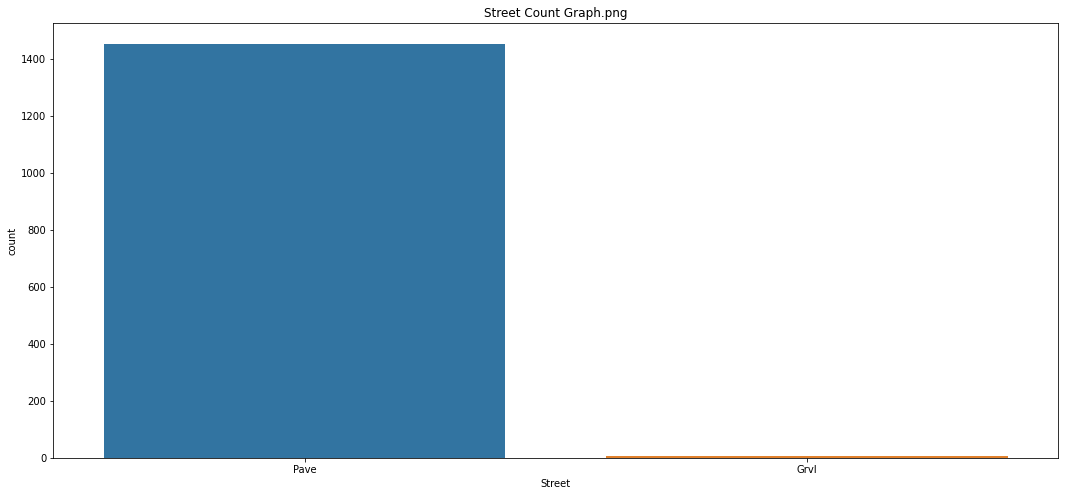

Lotshape Summary Table
     Count  Ratio
Reg    925  63.36
IR1    484  33.15
IR2     41   2.81
IR3     10   0.68
########################################## 



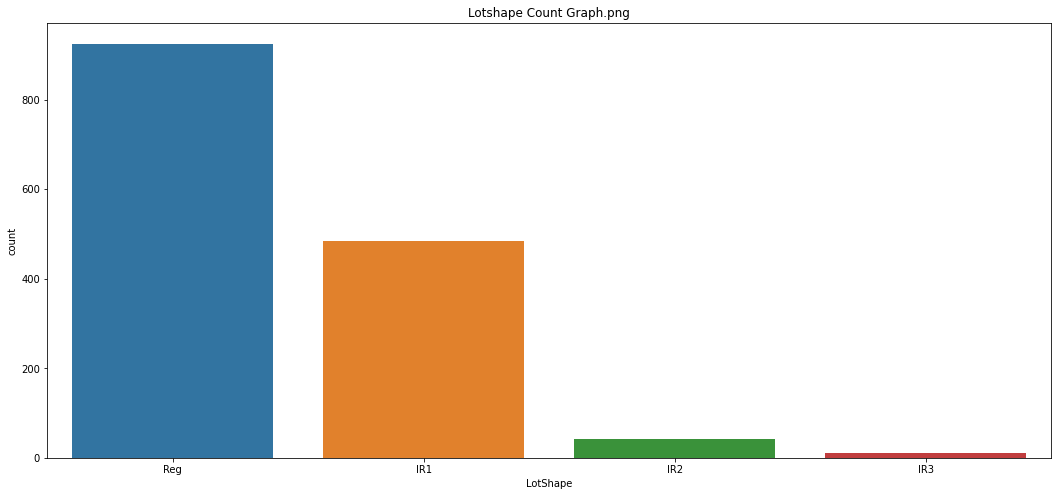

Landcontour Summary Table
     Count  Ratio
Lvl   1311  89.79
Bnk     63   4.32
HLS     50   3.42
Low     36   2.47
########################################## 



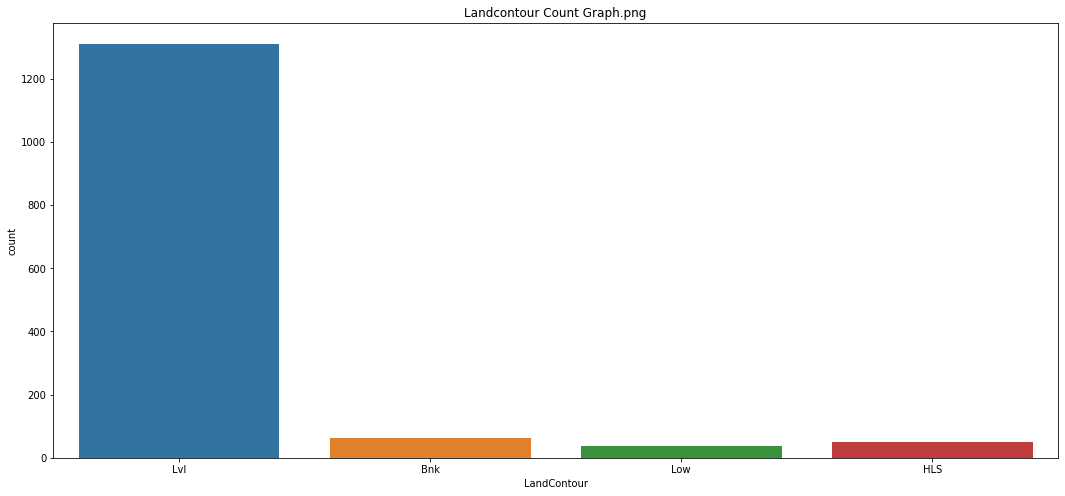

Utilities Summary Table
        Count  Ratio
AllPub   1459  99.93
NoSeWa      1   0.07
########################################## 



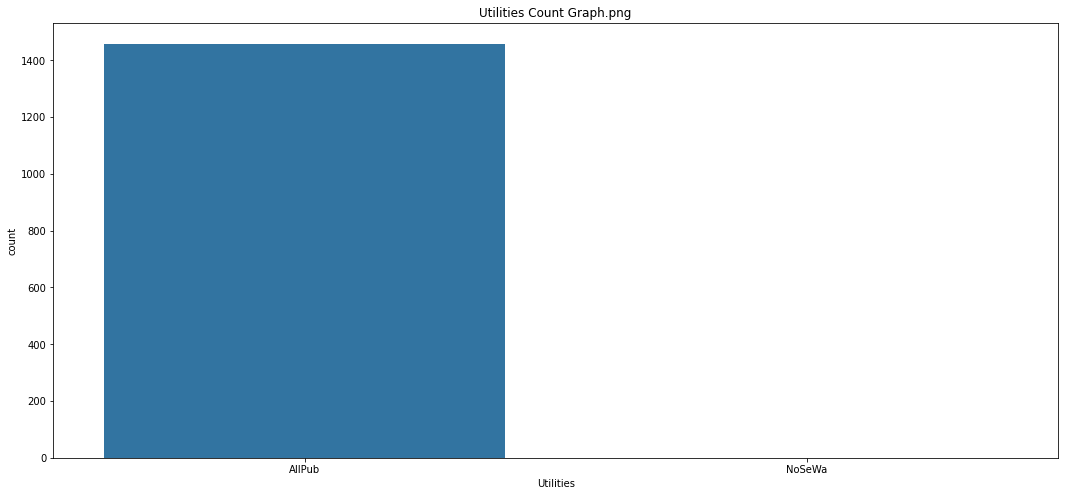

Lotconfig Summary Table
         Count  Ratio
Inside    1052  72.05
Corner     263  18.01
CulDSac     94   6.44
FR2         47   3.22
FR3          4   0.27
########################################## 



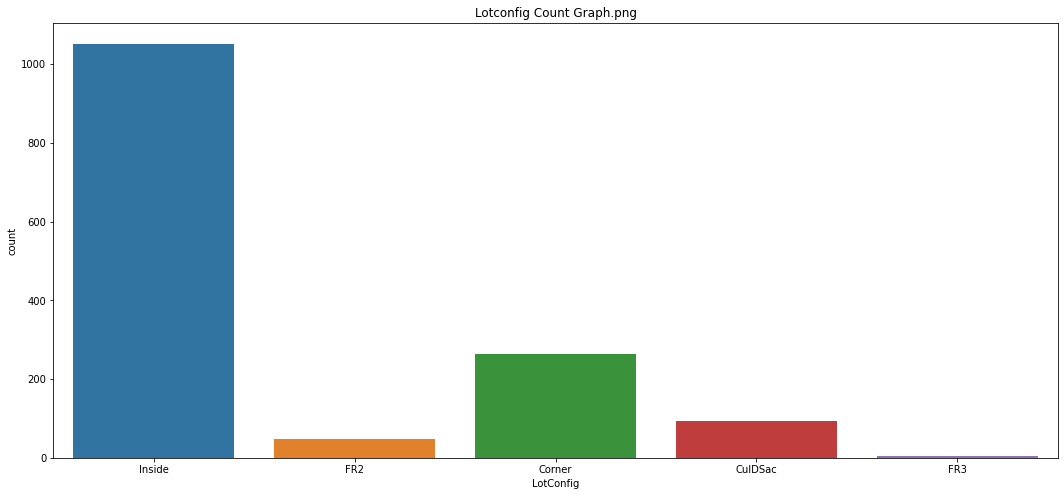

Landslope Summary Table
     Count  Ratio
Gtl   1382  94.66
Mod     65   4.45
Sev     13   0.89
########################################## 



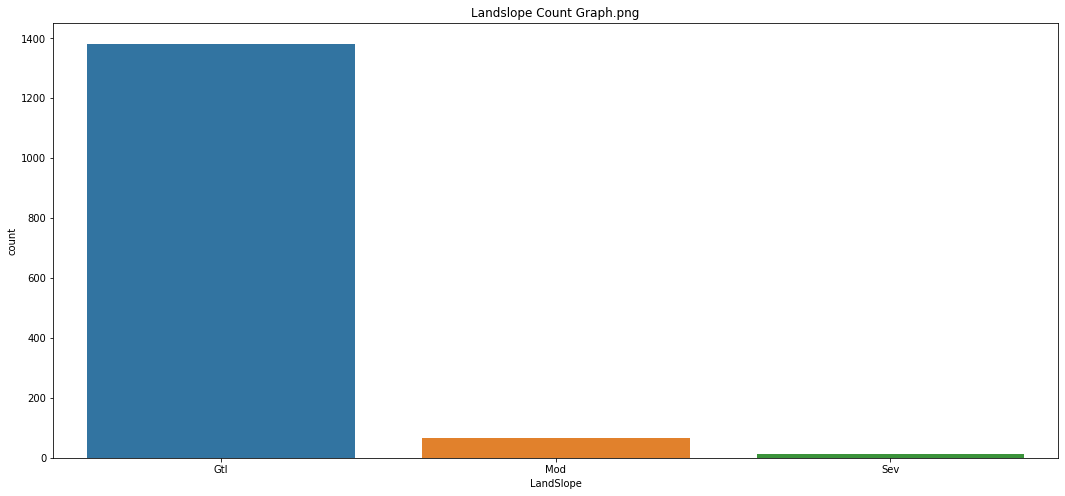

Neighborhood Summary Table
         Count  Ratio
NAmes      225  15.41
CollgCr    150  10.27
OldTown    113   7.74
Edwards    100   6.85
Somerst     86   5.89
Gilbert     79   5.41
NridgHt     77   5.27
Sawyer      74   5.07
NWAmes      73   5.00
SawyerW     59   4.04
BrkSide     58   3.97
Crawfor     51   3.49
Mitchel     49   3.36
NoRidge     41   2.81
Timber      38   2.60
IDOTRR      37   2.53
ClearCr     28   1.92
StoneBr     25   1.71
SWISU       25   1.71
MeadowV     17   1.16
Blmngtn     17   1.16
BrDale      16   1.10
Veenker     11   0.75
NPkVill      9   0.62
Blueste      2   0.14
########################################## 



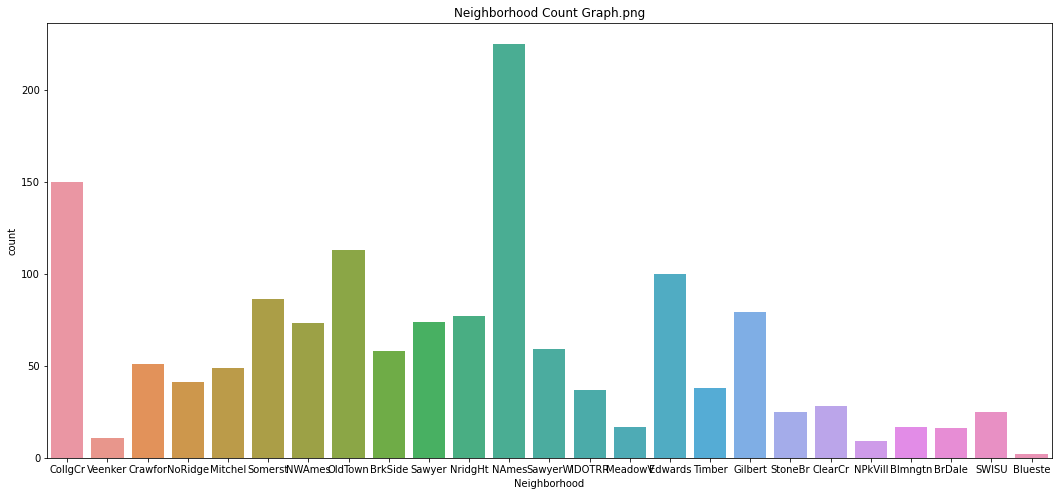

Condition1 Summary Table
        Count  Ratio
Norm     1260  86.30
Feedr      81   5.55
Artery     48   3.29
RRAn       26   1.78
PosN       19   1.30
RRAe       11   0.75
PosA        8   0.55
RRNn        5   0.34
RRNe        2   0.14
########################################## 



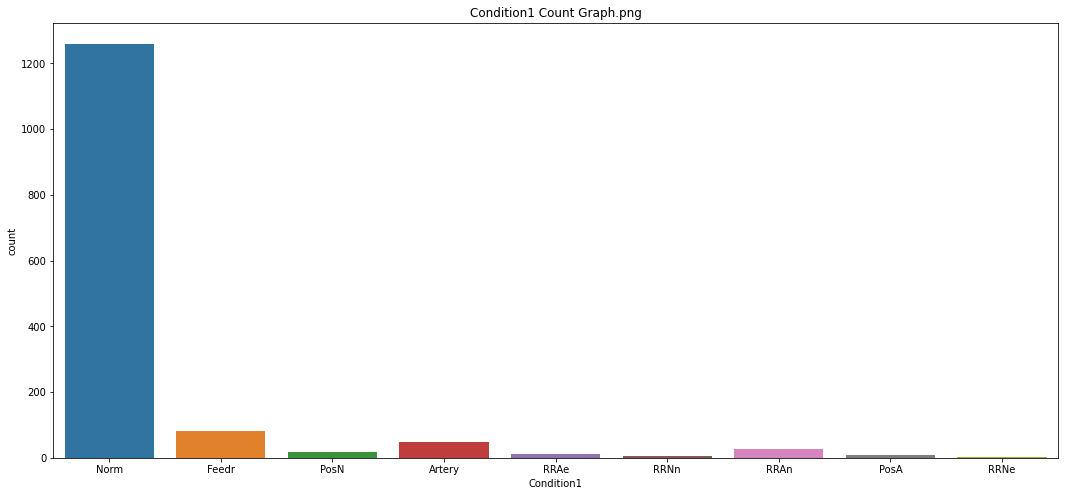

Condition2 Summary Table
        Count  Ratio
Norm     1445  98.97
Feedr       6   0.41
Artery      2   0.14
RRNn        2   0.14
PosN        2   0.14
PosA        1   0.07
RRAn        1   0.07
RRAe        1   0.07
########################################## 



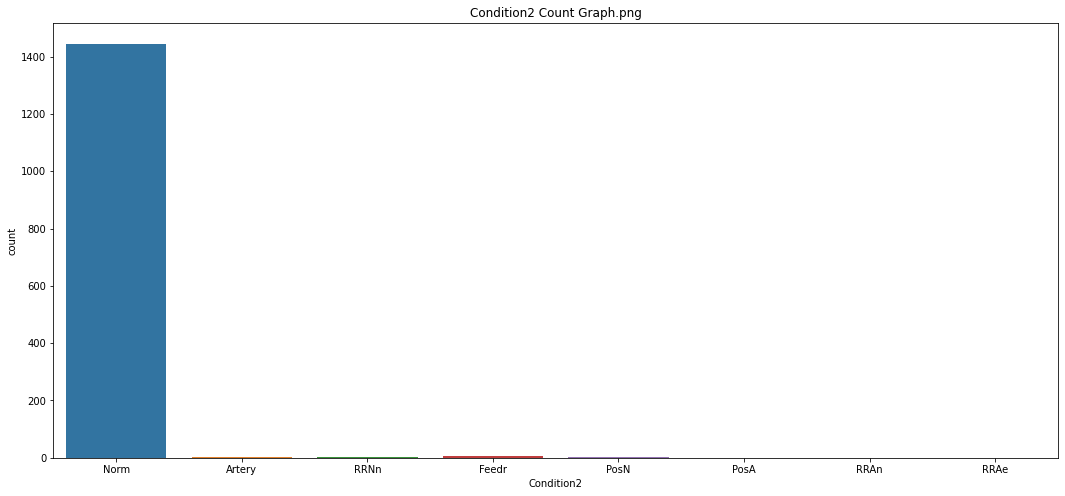

Bldgtype Summary Table
        Count  Ratio
1Fam     1220  83.56
TwnhsE    114   7.81
Duplex     52   3.56
Twnhs      43   2.95
2fmCon     31   2.12
########################################## 



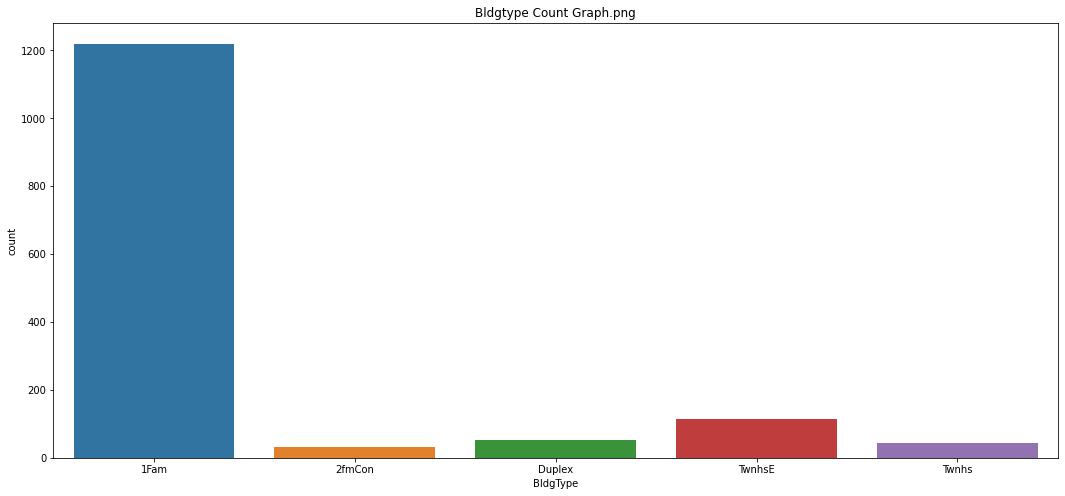

Housestyle Summary Table
        Count  Ratio
1Story    726  49.73
2Story    445  30.48
1.5Fin    154  10.55
SLvl       65   4.45
SFoyer     37   2.53
1.5Unf     14   0.96
2.5Unf     11   0.75
2.5Fin      8   0.55
########################################## 



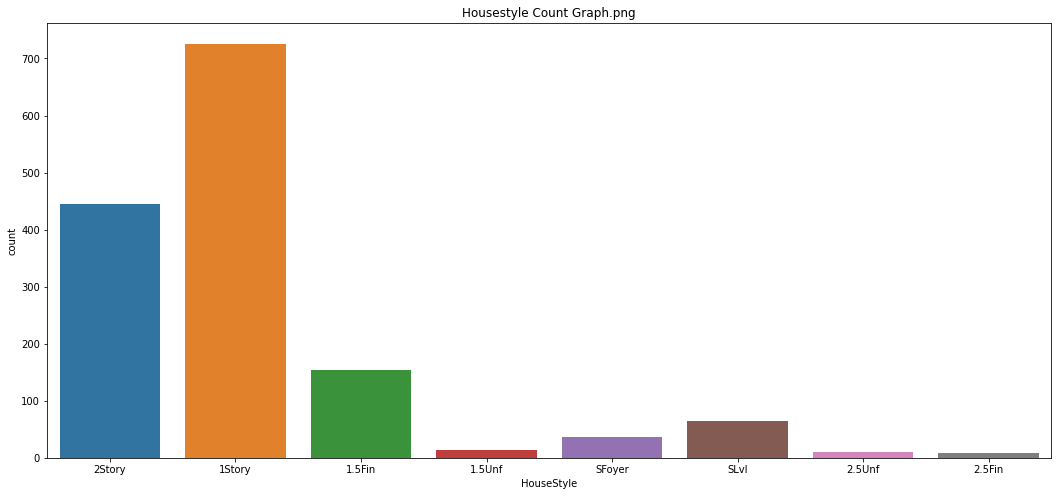

Roofstyle Summary Table
         Count  Ratio
Gable     1141  78.15
Hip        286  19.59
Flat        13   0.89
Gambrel     11   0.75
Mansard      7   0.48
Shed         2   0.14
########################################## 



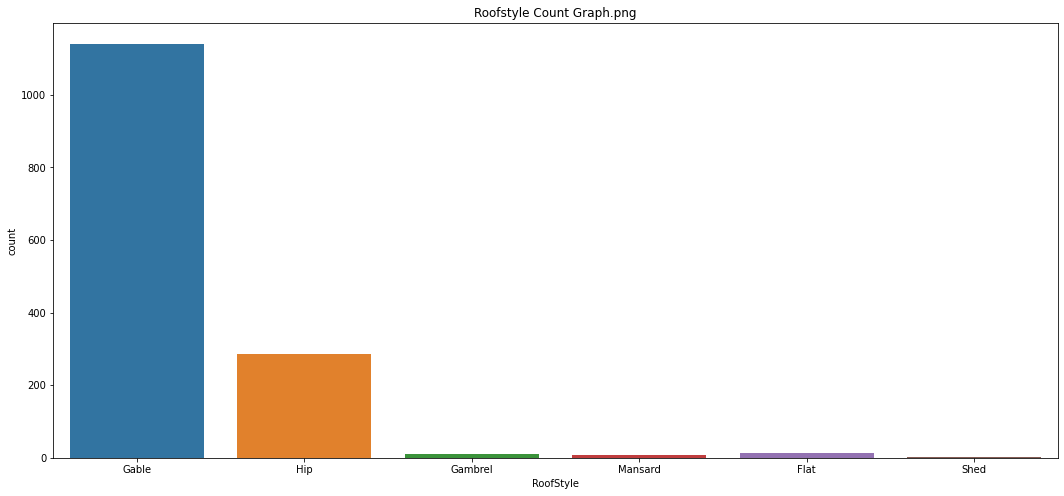

Roofmatl Summary Table
         Count  Ratio
CompShg   1434  98.22
Tar&Grv     11   0.75
WdShngl      6   0.41
WdShake      5   0.34
Metal        1   0.07
Membran      1   0.07
Roll         1   0.07
ClyTile      1   0.07
########################################## 



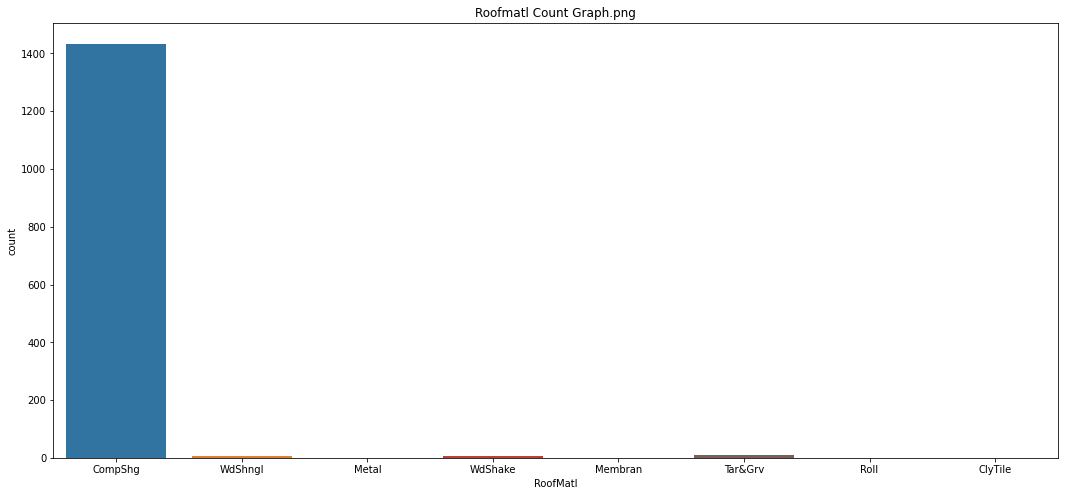

Exterior1st Summary Table
         Count  Ratio
VinylSd    515  35.27
HdBoard    222  15.21
MetalSd    220  15.07
Wd Sdng    206  14.11
Plywood    108   7.40
CemntBd     61   4.18
BrkFace     50   3.42
WdShing     26   1.78
Stucco      25   1.71
AsbShng     20   1.37
BrkComm      2   0.14
Stone        2   0.14
AsphShn      1   0.07
ImStucc      1   0.07
CBlock       1   0.07
########################################## 



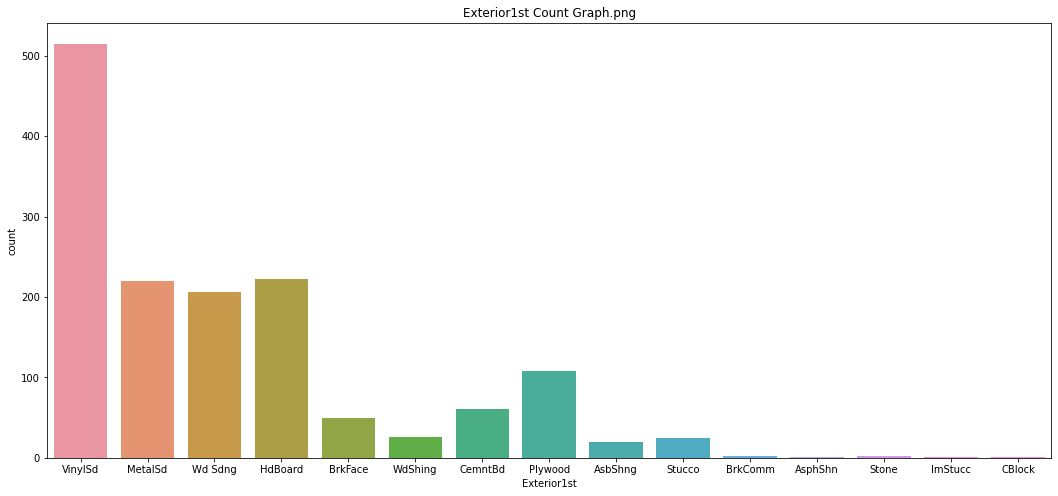

Exterior2nd Summary Table
         Count  Ratio
VinylSd    504  34.52
MetalSd    214  14.66
HdBoard    207  14.18
Wd Sdng    197  13.49
Plywood    142   9.73
CmentBd     60   4.11
Wd Shng     38   2.60
Stucco      26   1.78
BrkFace     25   1.71
AsbShng     20   1.37
ImStucc     10   0.68
Brk Cmn      7   0.48
Stone        5   0.34
AsphShn      3   0.21
Other        1   0.07
CBlock       1   0.07
########################################## 



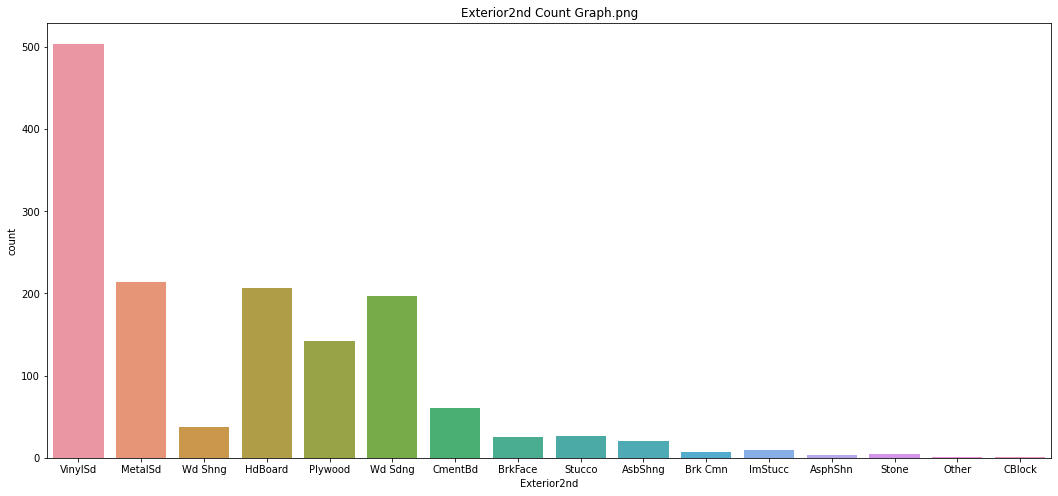

Masvnrtype Summary Table
         Count  Ratio
None       872  59.73
BrkFace    445  30.48
Stone      128   8.77
BrkCmn      15   1.03
########################################## 



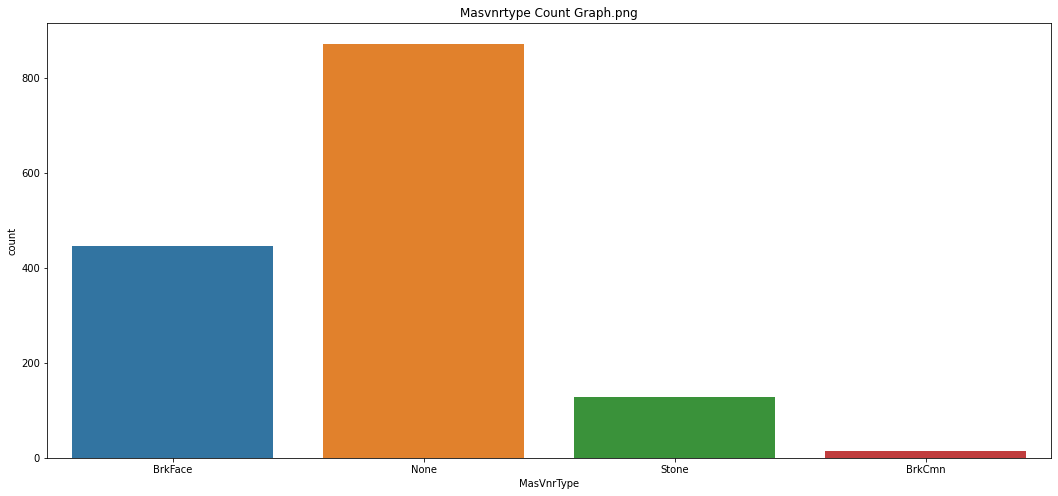

Foundation Summary Table
        Count  Ratio
PConc     647  44.32
CBlock    634  43.42
BrkTil    146  10.00
Slab       24   1.64
Stone       6   0.41
Wood        3   0.21
########################################## 



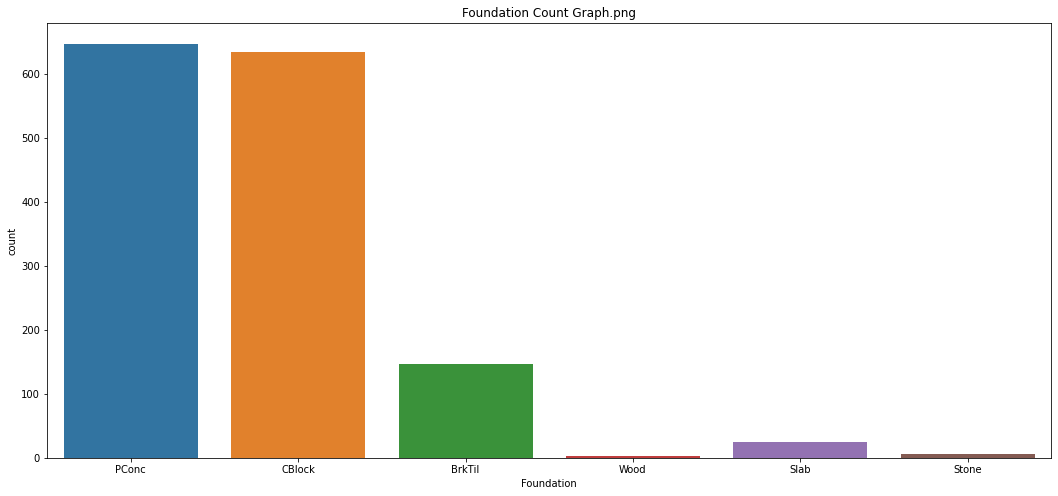

Bsmtexposure Summary Table
    Count  Ratio
No    991  67.88
Av    221  15.14
Gd    134   9.18
Mn    114   7.81
########################################## 



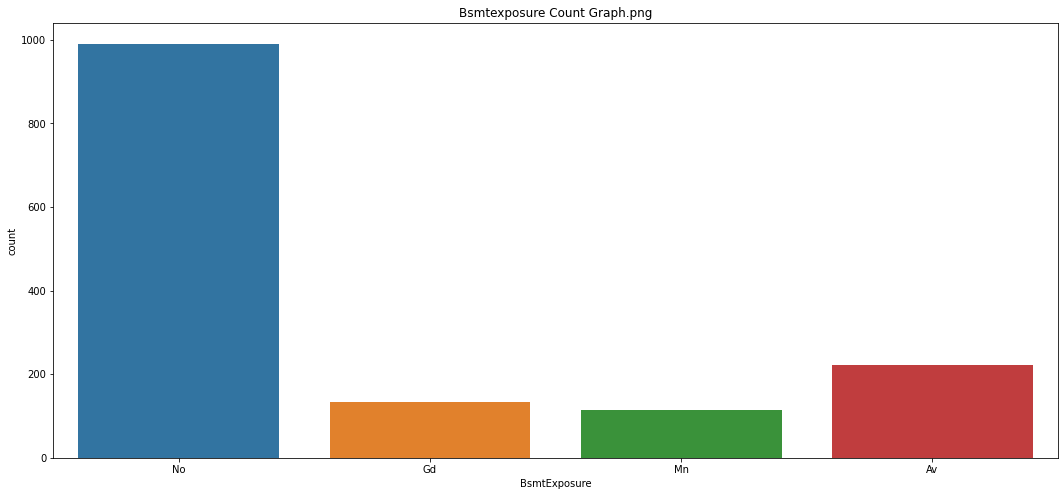

Heating Summary Table
       Count  Ratio
GasA    1428  97.81
GasW      18   1.23
Grav       7   0.48
Wall       4   0.27
OthW       2   0.14
Floor      1   0.07
########################################## 



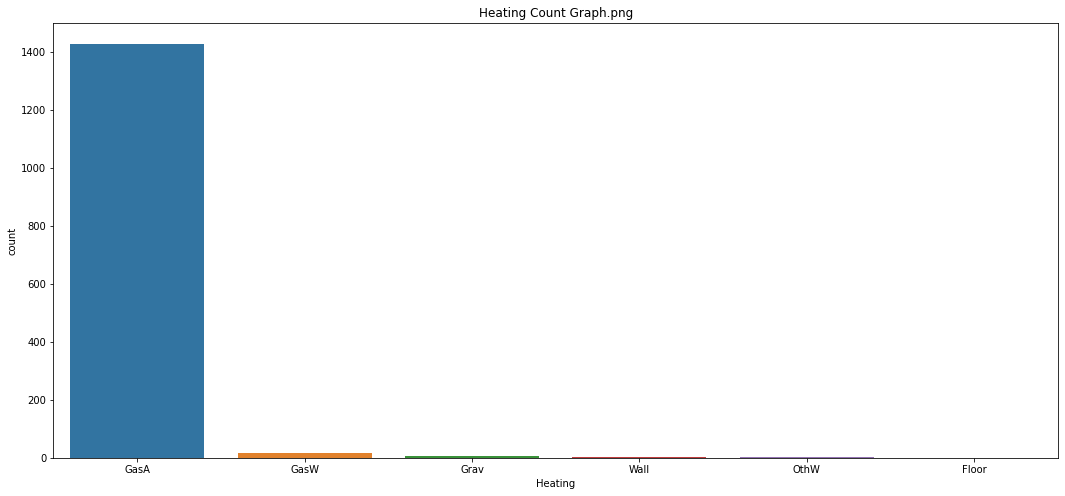

Heatingqc Summary Table
    Count  Ratio
Ex    741  50.75
TA    428  29.32
Gd    241  16.51
Fa     49   3.36
Po      1   0.07
########################################## 



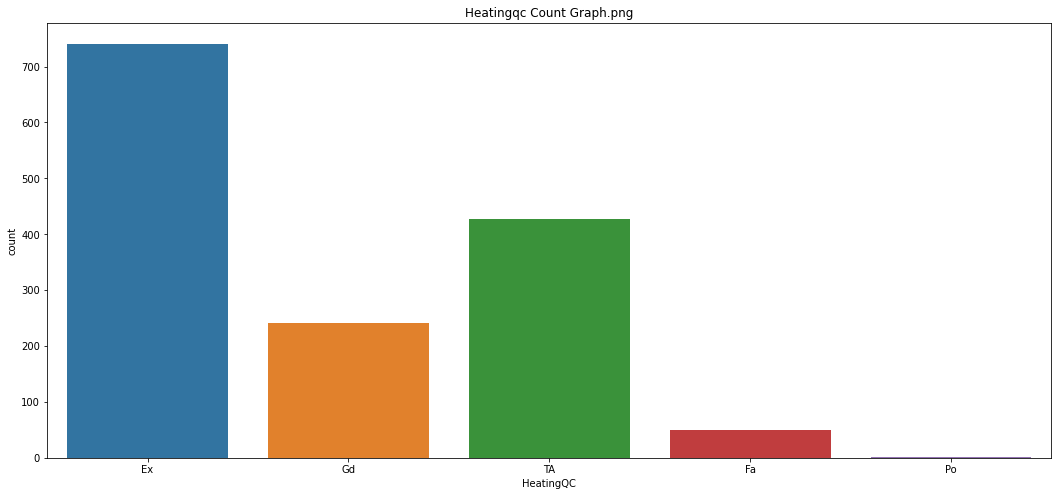

Centralair Summary Table
   Count  Ratio
Y   1365  93.49
N     95   6.51
########################################## 



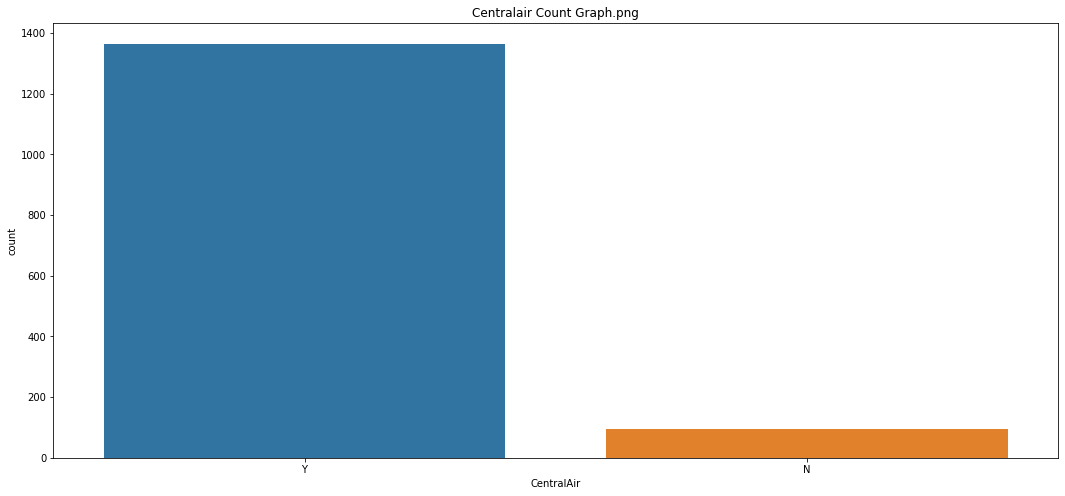

Electrical Summary Table
       Count  Ratio
SBrkr   1335  91.44
FuseA     94   6.44
FuseF     27   1.85
FuseP      3   0.21
Mix        1   0.07
########################################## 



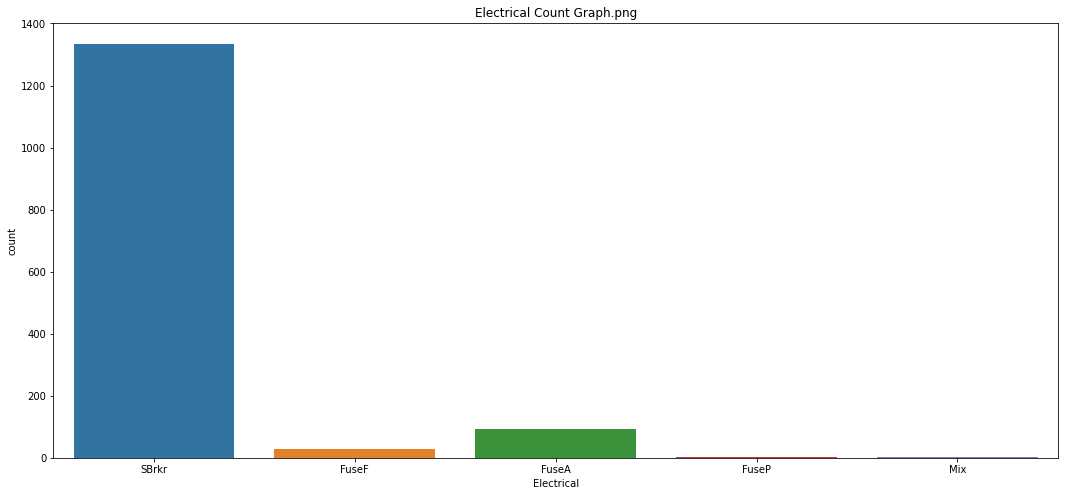

Kitchenqual Summary Table
    Count  Ratio
TA    735  50.34
Gd    586  40.14
Ex    100   6.85
Fa     39   2.67
########################################## 



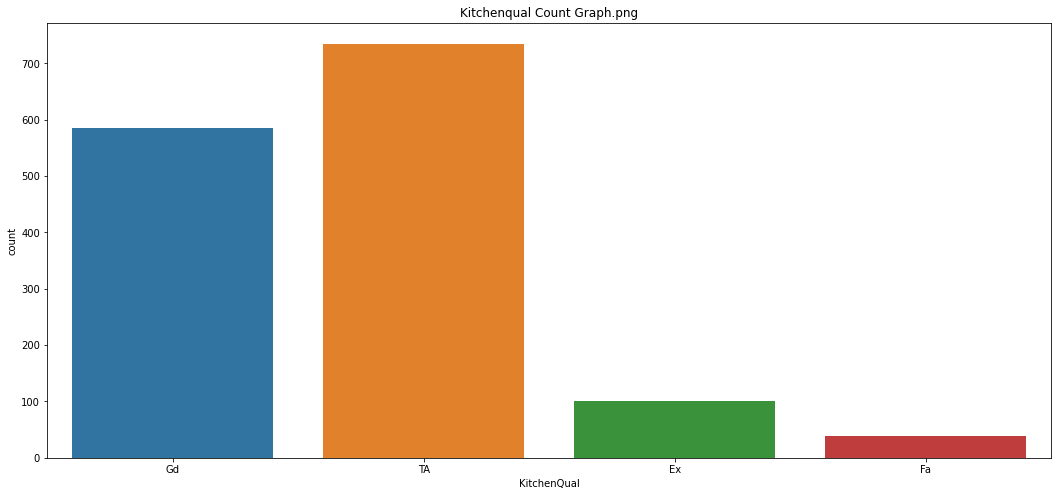

Functional Summary Table
      Count  Ratio
Typ    1360  93.15
Min2     34   2.33
Min1     31   2.12
Mod      15   1.03
Maj1     14   0.96
Maj2      5   0.34
Sev       1   0.07
########################################## 



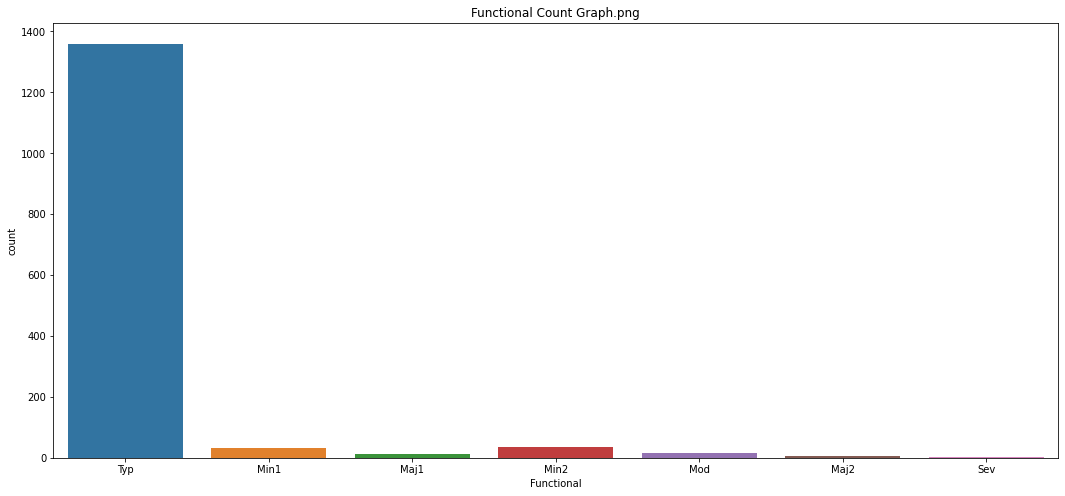

Garagetype Summary Table
         Count  Ratio
Attchd     951  65.14
Detchd     387  26.51
BuiltIn     88   6.03
Basment     19   1.30
CarPort      9   0.62
2Types       6   0.41
########################################## 



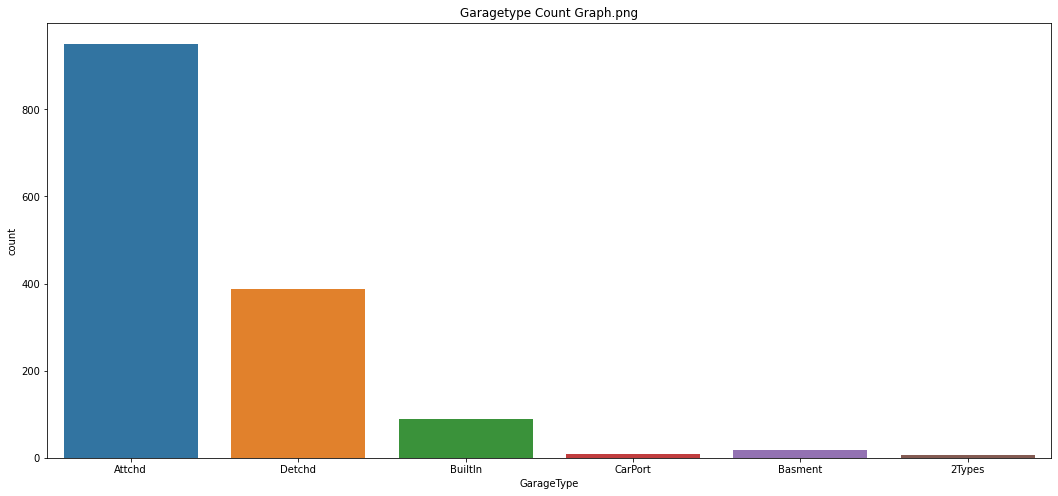

Garagefinish Summary Table
     Count  Ratio
Unf    686  46.99
RFn    422  28.90
Fin    352  24.11
########################################## 



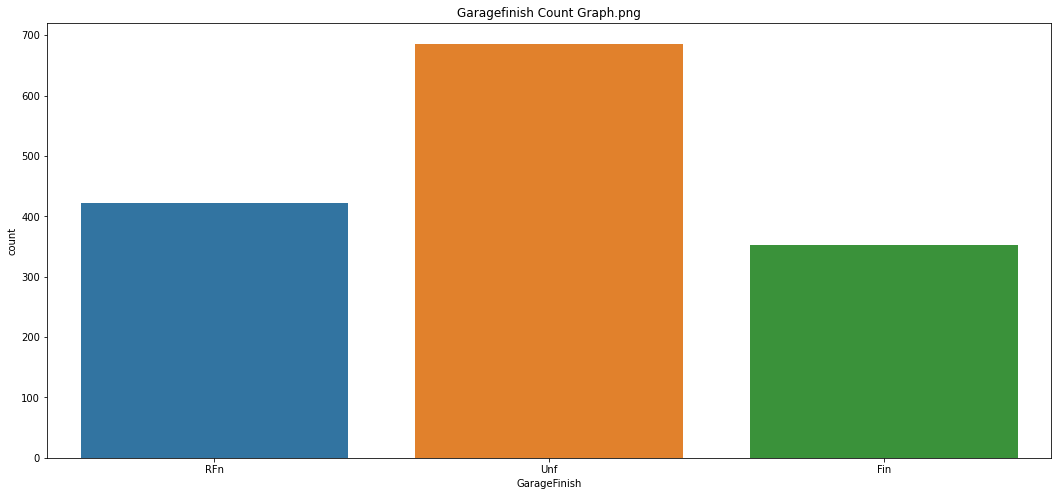

Paveddrive Summary Table
   Count  Ratio
Y   1340  91.78
N     90   6.16
P     30   2.05
########################################## 



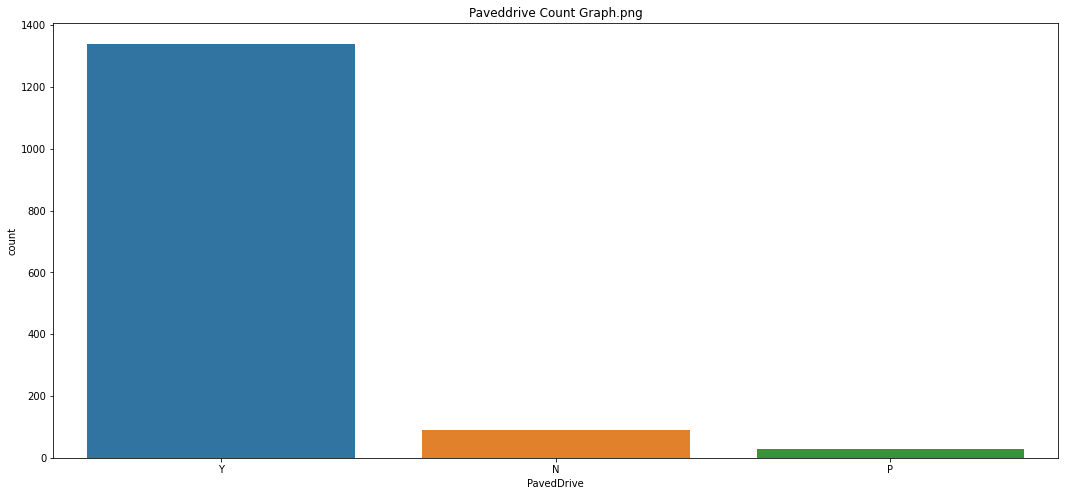

Saletype Summary Table
       Count  Ratio
WD      1267  86.78
New      122   8.36
COD       43   2.95
ConLD      9   0.62
ConLI      5   0.34
ConLw      5   0.34
CWD        4   0.27
Oth        3   0.21
Con        2   0.14
########################################## 



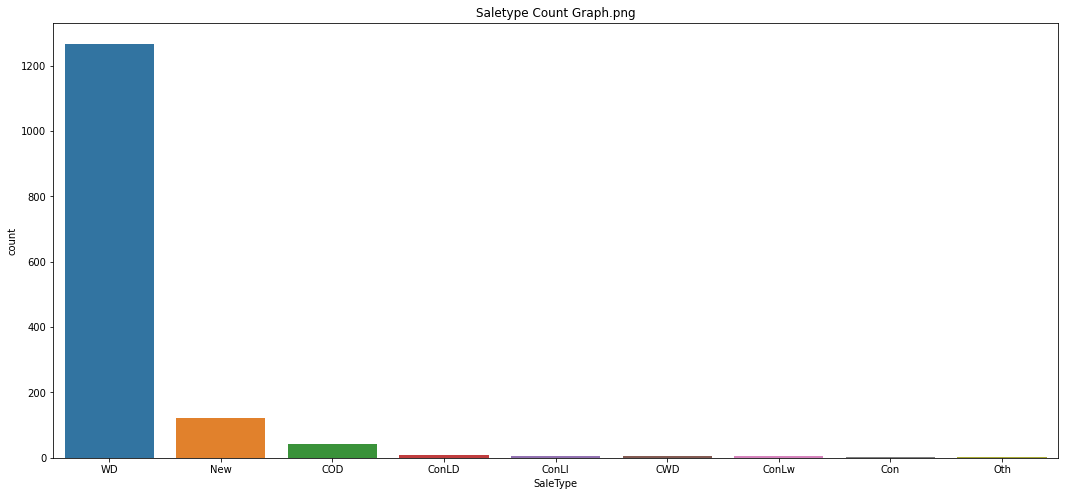

Salecondition Summary Table
         Count  Ratio
Normal    1198  82.05
Partial    125   8.56
Abnorml    101   6.92
Family      20   1.37
Alloca      12   0.82
AdjLand      4   0.27
########################################## 



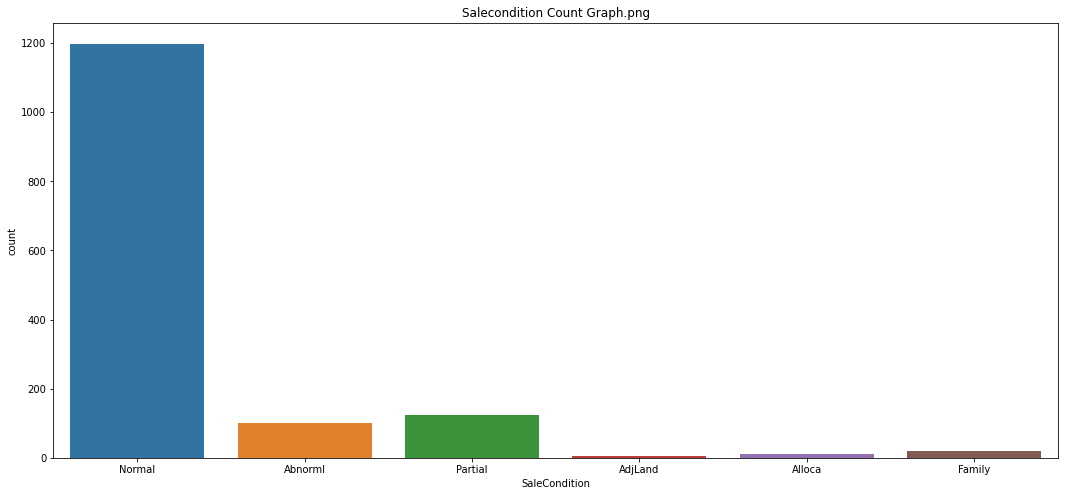

In [ ]:
for col in categorical_cols:
    cat_summary(df, col, True)

*Removing Irrelevant Categorical Features: Results from Univariate Analysis"*

In [ ]:
# The 'Utilities' feature has very low variance as it has almost only one value (AllPub) with very few exceptions.
#This means that it does not provide much useful information for the prediction of the target variable (SalePrice).
#As a result, dropping the 'Utilities' feature is reasonable and will not lead to a significant loss of information.

# Dropping the 'Utilities' column from the dataframe
df.drop('Utilities', axis=1, inplace=True)

In [ ]:
# Street is a low variance feature with almost one value.
#This means it does not provide much information to the model and can be safely dropped.

# Drop 'Street' feature
df.drop('Street', axis=1, inplace=True)

In [ ]:
# CentralAir is a low variance feature with almost one value.
#This means it does not provide much information to the model and can be safely dropped.

# Drop 'CentralAir' feature
df.drop('CentralAir', axis=1, inplace=True)

In [ ]:
# Replace the values Tar&Grv, WdShngl, WdShake, Metal, Membran, Roll, Clytile with Others
df['RoofMatl'] = df['RoofMatl'].replace(['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Membran', 'Roll', 'ClyTile'], 'Others')

In [ ]:
# Replace the values Bnk, HLS and low with Others
df['LandContour'] = df['LandContour'].replace(['Bnk', 'HLS', 'Low'], 'Others')

In [ ]:
# Replace the values Mod, Sev with Others
df['LandSlope'] = df['LandSlope'].replace(['Mod', 'Sev'], 'Others')

In [ ]:
# Replace the values Feedr, Artery, RRAn, PosN, RRAe, PosA, RRNn and RRNe with Others
df['Condition1'] = df['Condition1'].replace(['Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'], 'Others')

In [ ]:
# Replace the values Feedr, Artery, RRAn, PosN, RRAe, PosA, RRNn and RRNe with Others
df['Condition2'] = df['Condition2'].replace(['Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe'], 'Others')

In [ ]:
# Replace the values GasW, Grav, Wall, OthW, Floor with Others
df['Heating'] = df['Heating'].replace(['GasW', 'Grav', 'Wall', 'OthW', 'Floor'], 'Others')

In [ ]:
# Replace the values FuseA, FuseF, FuseP, Mix with Others
df['Electrical'] = df['Electrical'].replace(['FuseA', 'FuseF', 'FuseP', 'Mix'], 'Others')

In [ ]:
# Replace the values Min2, Min1, Mod, Maj1, Maj2, Sev with Others
df['Functional'] = df['Functional'].replace(['Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev'], 'Others')

In [ ]:
# Replace the values P with Y
df['PavedDrive'] = df['PavedDrive'].replace(['P'], 'Y')

**Analysis of Numerical Variables**

In [ ]:
# This code selects only numerical columns from the dataframe 'df', and computes summary statistics for each column
# The summary statistics include count, mean, standard deviation, minimum value, 5th percentile value, 10th percentile value, 25th percentile value,
# median (50th percentile value), 75th percentile value, 95th percentile value, and 99th percentile value
# The 'T' at the end of the code transposes the resulting dataframe, so that each column now represents a variable
# This makes it easier to read and compare the summary statistics for each variable
df[numerical_cols].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T


,count,mean,std,min,5%,10%,25%,50%,75%,95%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.0,20.0,50.000000,70.00,160.00,190.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,35.95,49.0,60.0,70.049958,79.00,104.00,137.41,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,3311.70,5000.0,7553.5,9478.500000,11601.50,17401.15,37567.64,215245.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1950.0,1967.0,1994.000000,2004.00,2007.00,2009.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.0,0.0,0.000000,164.25,456.00,791.28,1600.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,0.00,74.9,223.0,477.500000,808.00,1468.00,1797.05,2336.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,848.00,912.0,1129.5,1464.000000,1776.75,2466.10,3123.48,5642.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,2.0,2.0,3.000000,3.00,4.00,5.00,8.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,4.00,5.0,5.0,6.000000,7.00,10.00,11.00,14.0
GarageYrBlt,1460.0,1978.217123,24.716517,1900.0,1930.00,1945.0,1961.0,1979.000000,2002.00,2007.00,2009.00,2010.0


In [ ]:
def num_summary(dataframe, col_name, plot=False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    # Print summary statistics of the given column
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        # Set figure size to 18 x 8 inches
        plt.figure(figsize=(18, 8))

        sns.histplot(dataframe[col_name], kde=True, color='#1f77b4', edgecolor='black')

        # Set x and y axis labels with larger font sizes
        plt.xlabel(col_name, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)

        # Set tick label font size
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Set plot title with larger font size
        plt.title("{} Histogram Graph".format(col_name.capitalize()), fontsize=16)

        # Save and show plot
        plt.savefig("{} Histogram Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
5%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


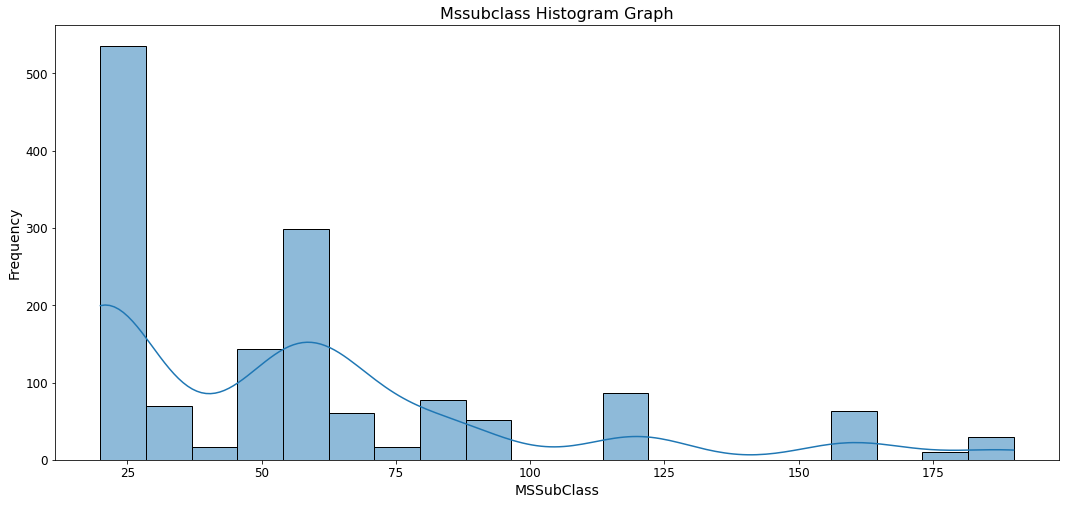

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
5%         35.950000
10%        49.000000
20%        59.000000
30%        60.000000
40%        68.000000
50%        70.049958
60%        70.049958
70%        75.000000
80%        80.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64


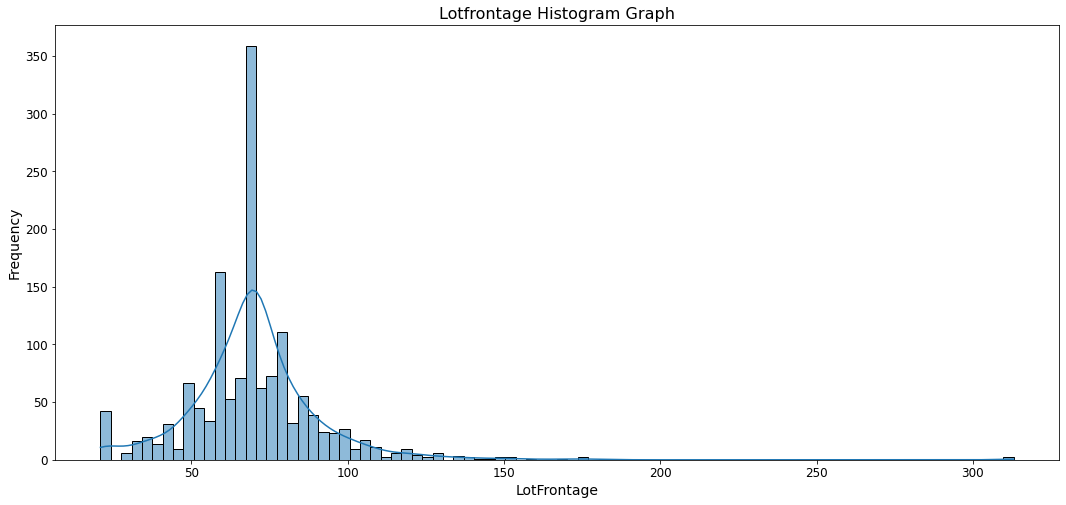

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
5%         3311.700000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64


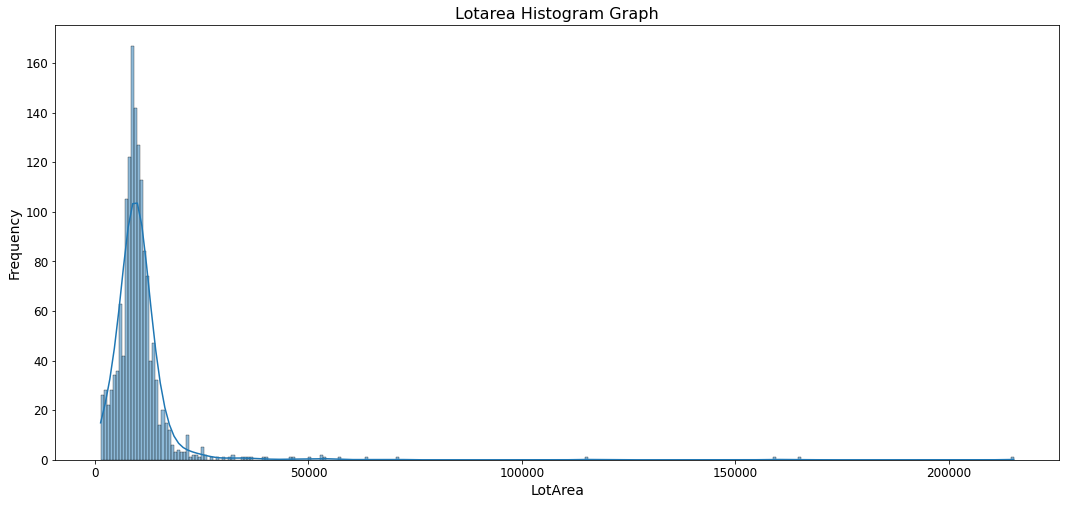

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
5%       1950.000000
10%      1950.000000
20%      1961.800000
30%      1971.000000
40%      1980.000000
50%      1994.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


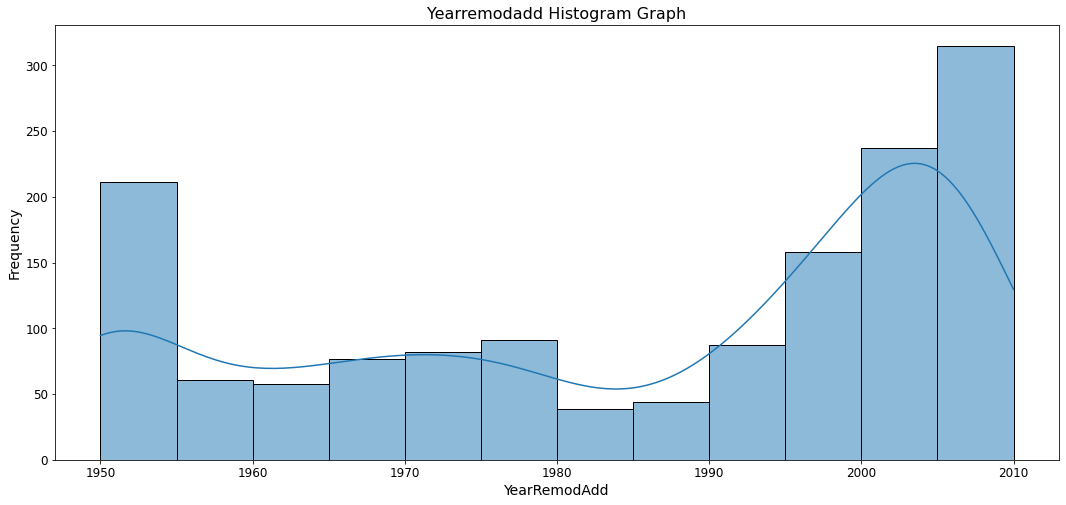

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        25.200000
70%       116.000000
80%       205.200000
90%       335.000000
95%       456.000000
99%       791.280000
max      1600.000000
Name: MasVnrArea, dtype: float64


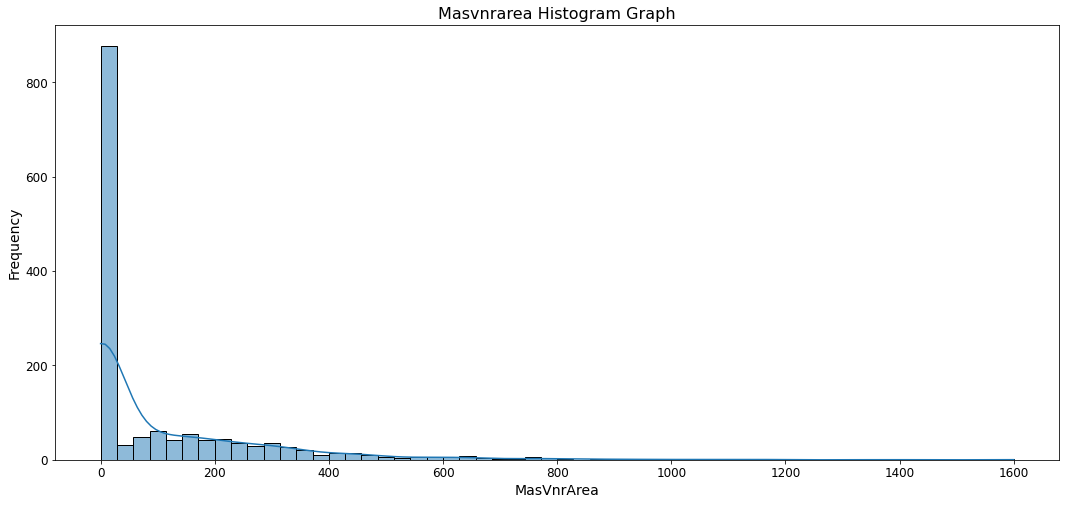

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
5%          0.000000
10%        74.900000
20%       172.000000
30%       280.000000
40%       374.600000
50%       477.500000
60%       604.400000
70%       736.000000
80%       896.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


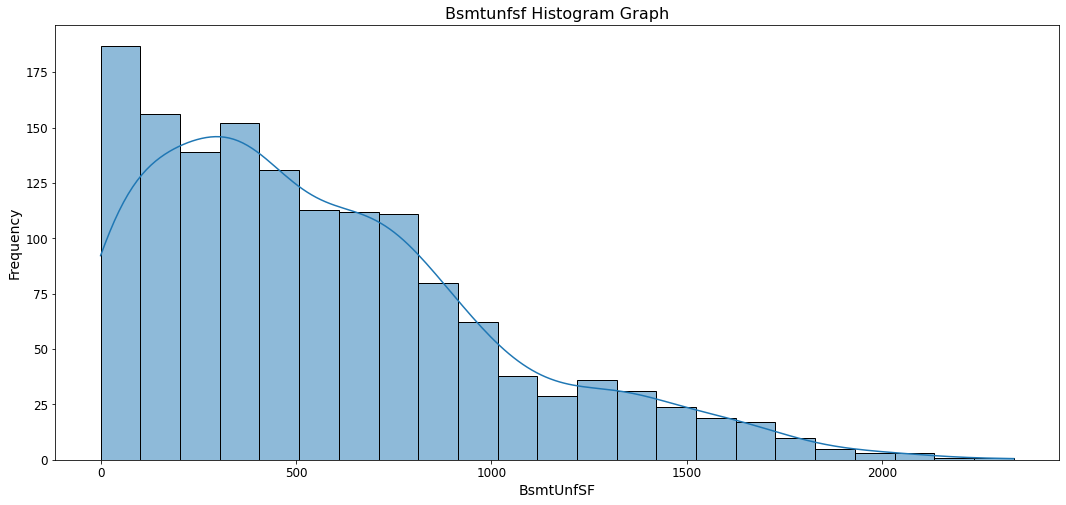

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
5%        848.000000
10%       912.000000
20%      1066.600000
30%      1208.000000
40%      1339.000000
50%      1464.000000
60%      1578.000000
70%      1709.300000
80%      1869.000000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64


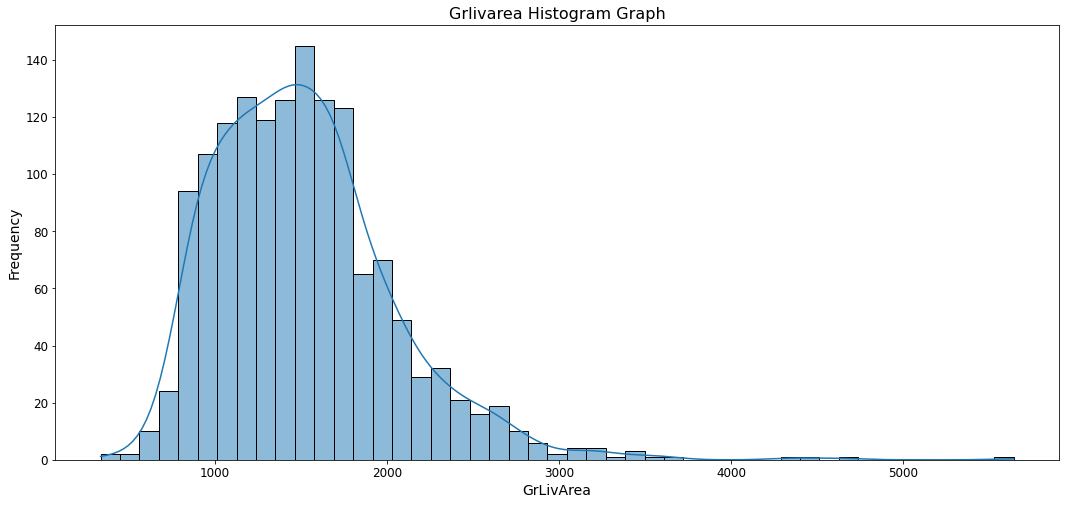

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
5%          2.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         3.000000
80%         3.000000
90%         4.000000
95%         4.000000
99%         5.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


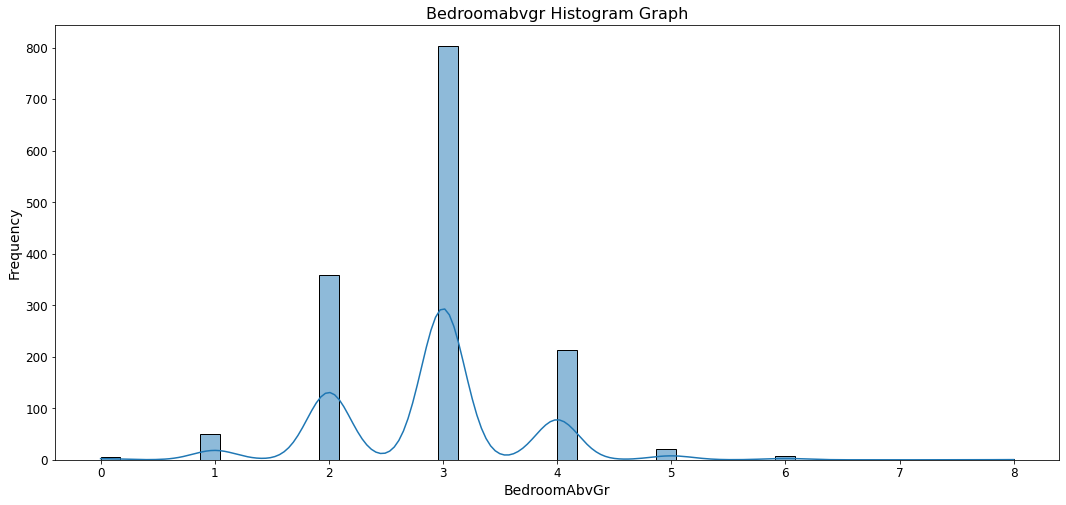

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         9.000000
95%        10.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


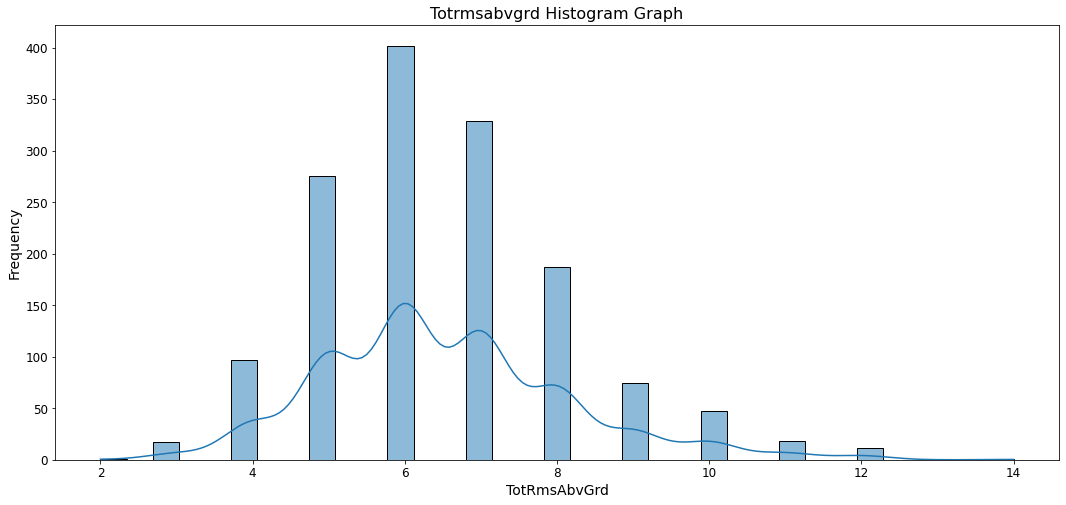

count    1460.000000
mean     1978.217123
std        24.716517
min      1900.000000
5%       1930.000000
10%      1945.000000
20%      1957.000000
30%      1965.000000
40%      1972.000000
50%      1979.000000
60%      1992.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


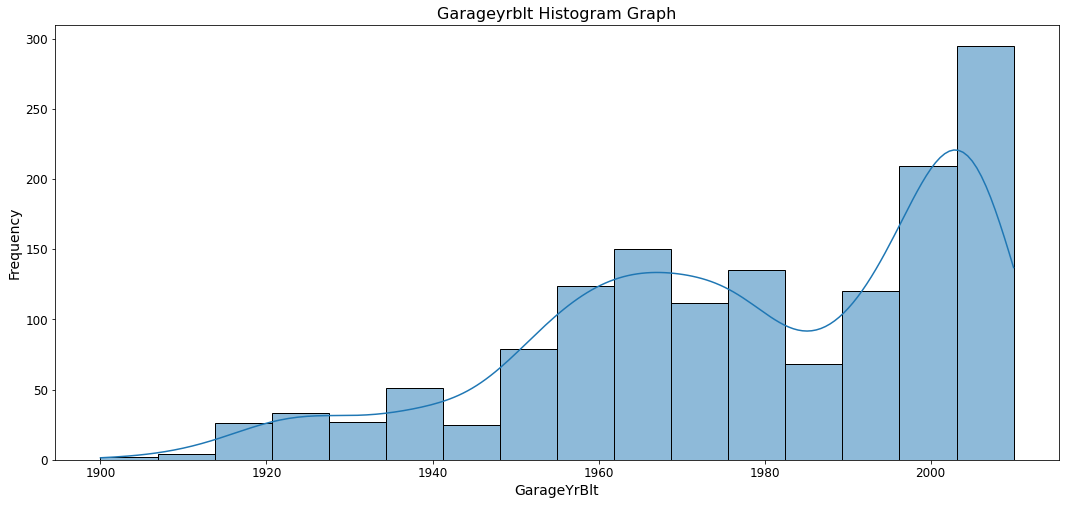

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       857.000000
Name: WoodDeckSF, dtype: float64


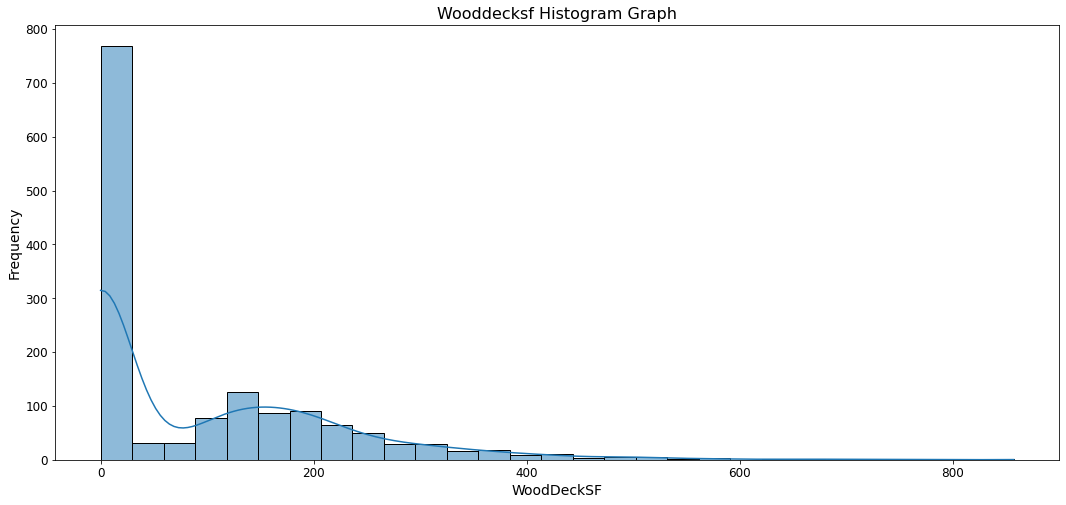

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
5%          2.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


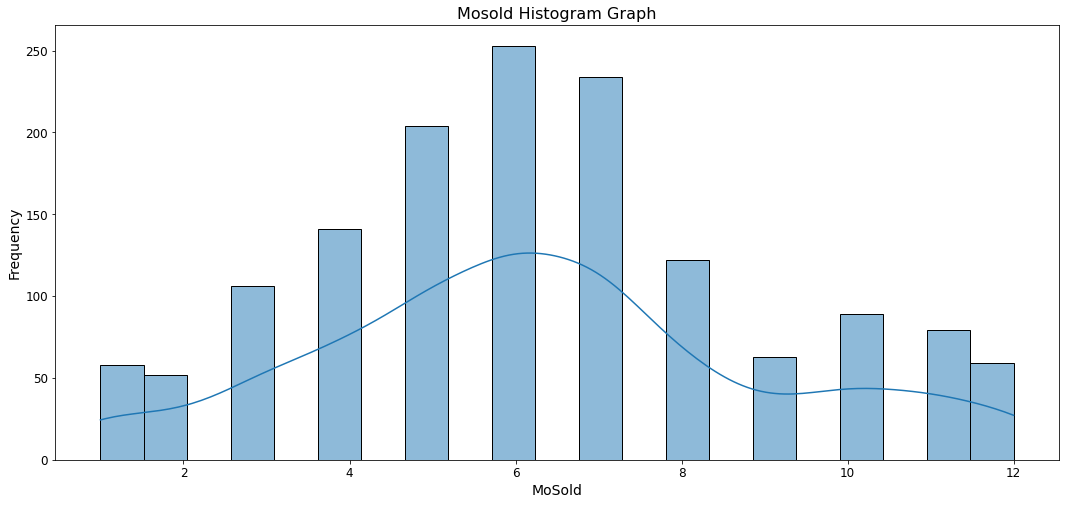

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64


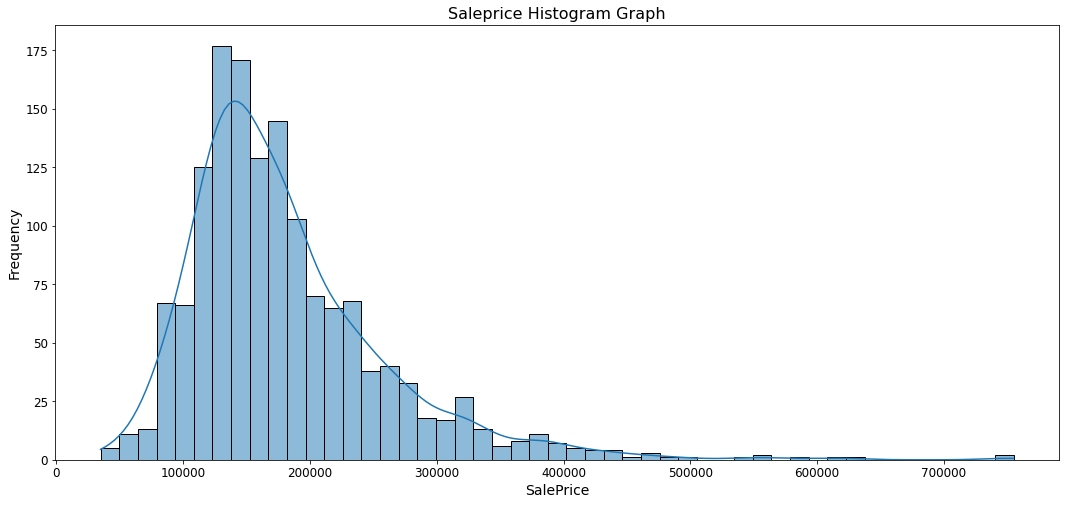

count    1460.000000
mean        2.210616
std         0.785399
min         1.000000
5%          1.000000
10%         1.000000
20%         1.500000
30%         2.000000
40%         2.000000
50%         2.000000
60%         2.500000
70%         2.500000
80%         3.000000
90%         3.500000
95%         3.500000
99%         4.000000
max         6.000000
Name: TotalBathrooms, dtype: float64


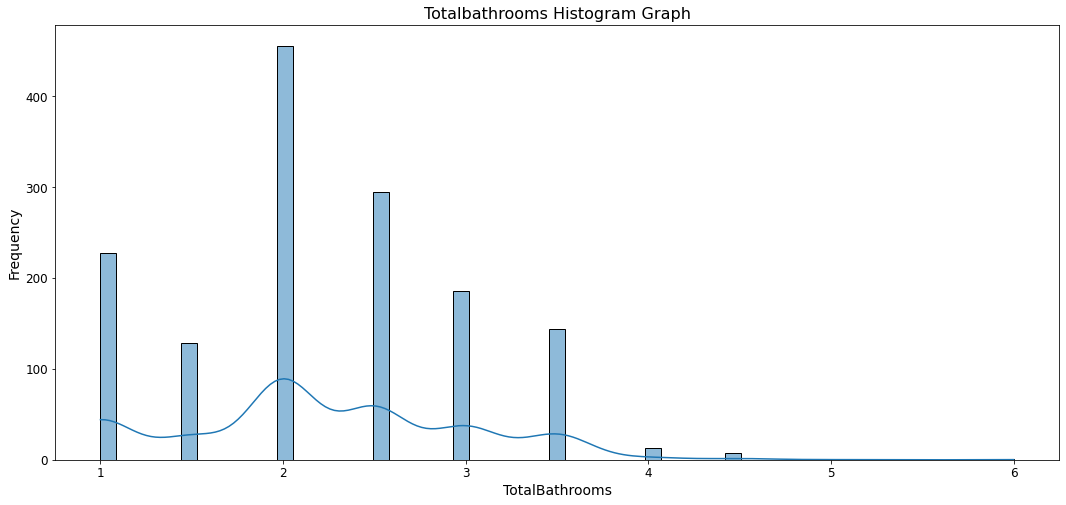

count    1460.000000
mean      976.719178
std       709.723243
min         0.000000
5%          0.000000
10%       240.000000
20%       295.600000
30%       498.000000
40%       867.200000
50%       948.000000
60%      1026.800000
70%      1113.200000
80%      1242.000000
90%      2137.200000
95%      2520.000000
99%      3066.150000
max      5424.000000
Name: GarageCapacity, dtype: float64


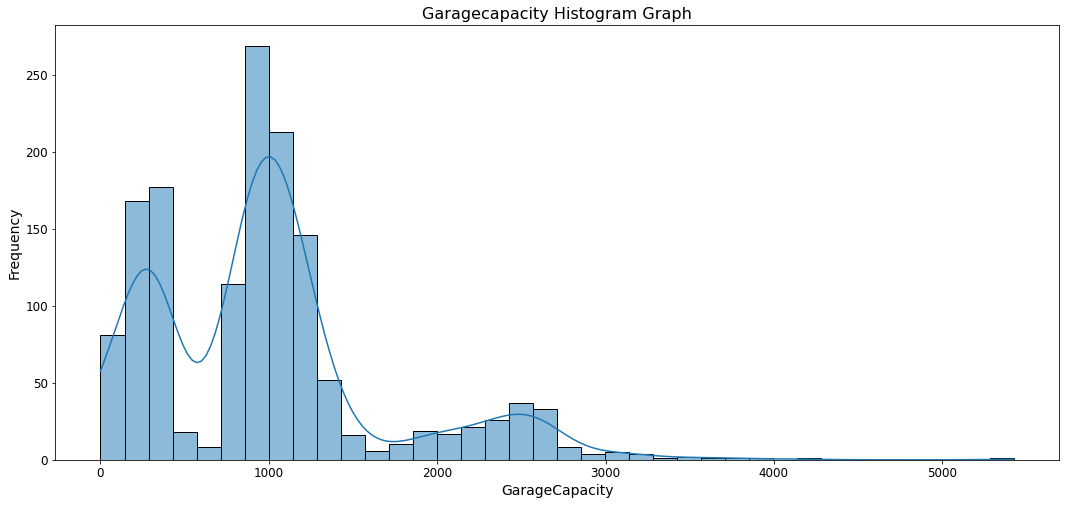

count     1460.000000
mean      2567.048630
std        821.714421
min        334.000000
5%        1535.950000
10%       1696.000000
20%       1903.600000
30%       2112.000000
40%       2272.000000
50%       2474.000000
60%       2676.000000
70%       2880.000000
80%       3166.400000
90%       3556.100000
95%       3973.400000
99%       4845.250000
max      11752.000000
Name: TotalSF, dtype: float64


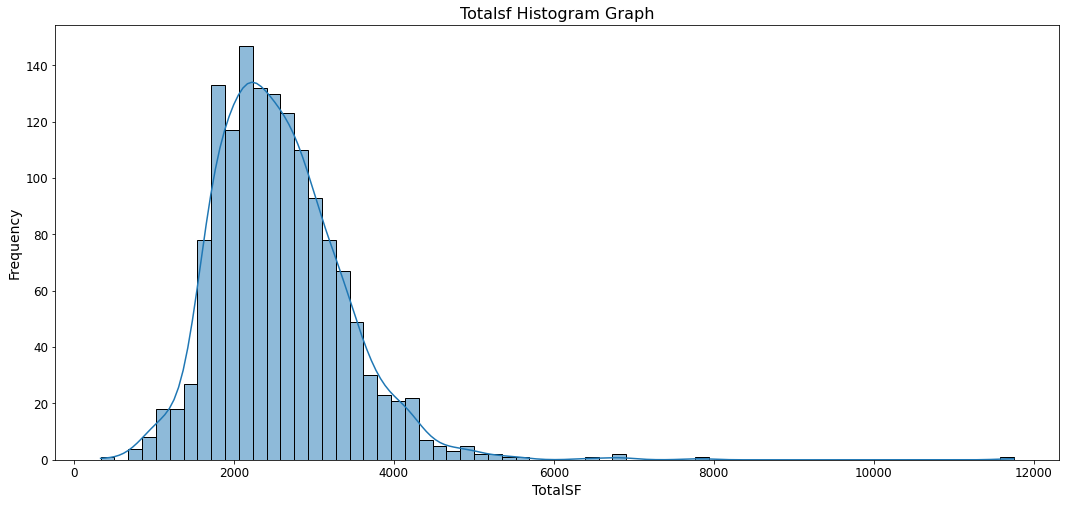

count    1460.000000
mean       11.674658
std         1.693527
min         2.000000
5%          9.000000
10%        10.000000
20%        10.000000
30%        11.000000
40%        11.000000
50%        12.000000
60%        12.000000
70%        12.000000
80%        13.000000
90%        14.000000
95%        14.000000
99%        16.000000
max        19.000000
Name: OverallScore, dtype: float64


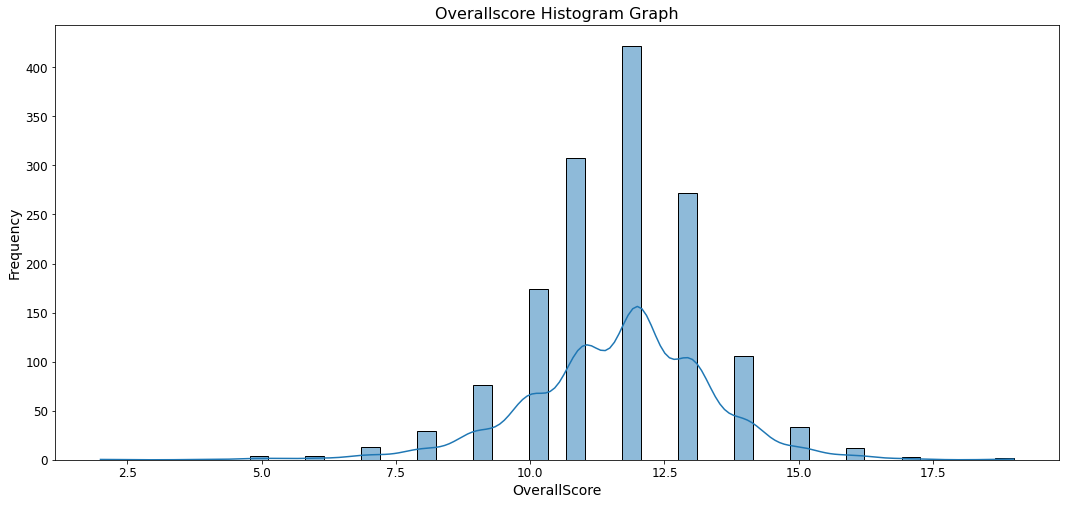

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
5%          1.000000
10%         1.000000
20%         5.000000
30%        11.000000
40%        24.000000
50%        35.000000
60%        42.400000
70%        51.000000
80%        60.200000
90%        84.000000
95%        91.000000
99%       110.410000
max       136.000000
Name: Age, dtype: float64


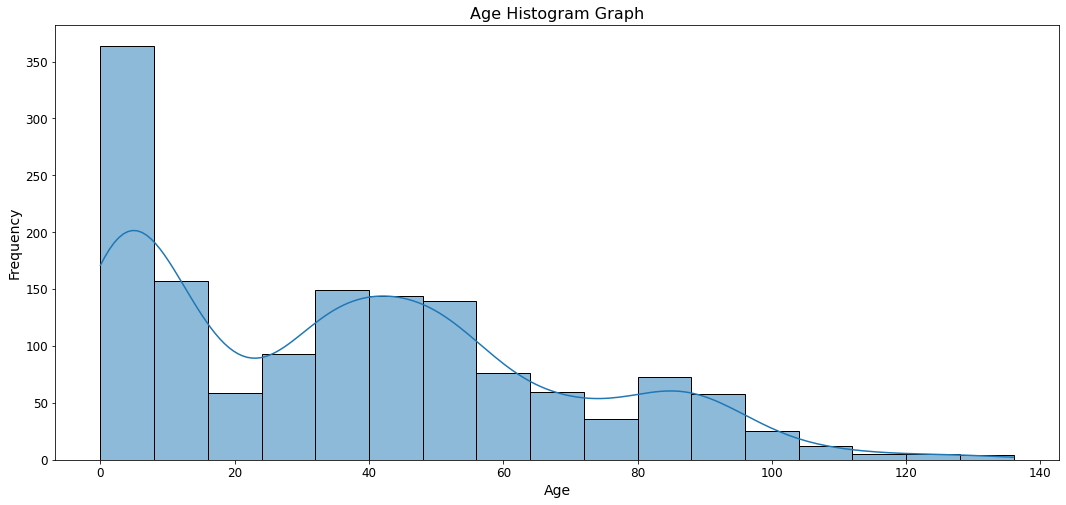

count    1460.000000
mean        6.576027
std         0.788262
min         3.000000
5%          6.000000
10%         6.000000
20%         6.000000
30%         6.000000
40%         6.000000
50%         7.000000
60%         7.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%         8.000000
max         9.000000
Name: BsmtOverall, dtype: float64


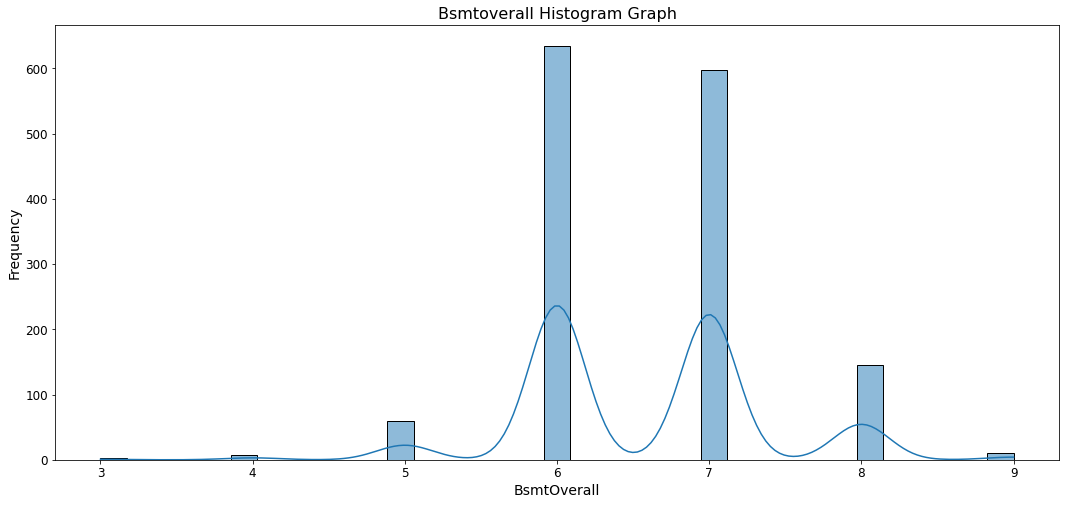

count    1460.000000
mean        5.952055
std         0.427502
min         2.000000
5%          6.000000
10%         6.000000
20%         6.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         6.000000
80%         6.000000
90%         6.000000
95%         6.000000
99%         7.000000
max        10.000000
Name: GarageOverall, dtype: float64


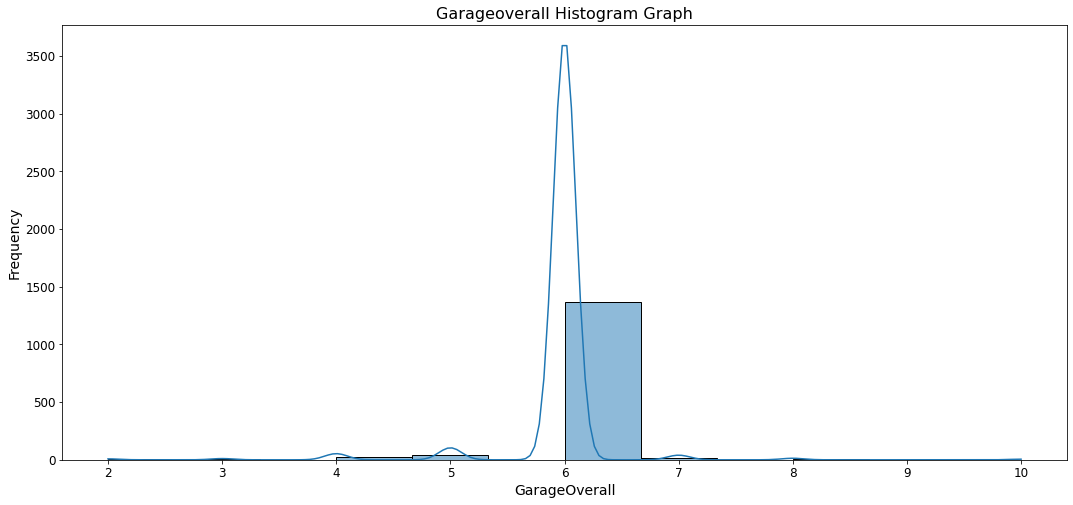

count    1460.000000
mean        6.479452
std         0.675825
min         4.000000
5%          6.000000
10%         6.000000
20%         6.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         7.000000
90%         7.000000
95%         8.000000
99%         8.000000
max        10.000000
Name: ExterOverall, dtype: float64


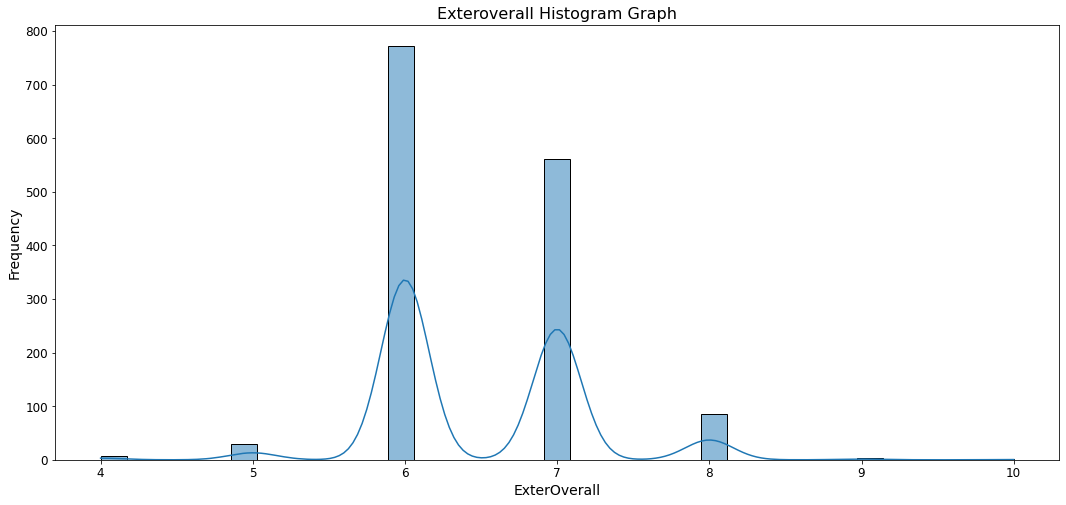

count    1460.000000
mean       87.084932
std       105.190364
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%        34.000000
50%        48.000000
60%        75.000000
70%       112.300000
80%       160.000000
90%       236.100000
95%       288.000000
99%       410.690000
max      1027.000000
Name: TotalPorchArea, dtype: float64


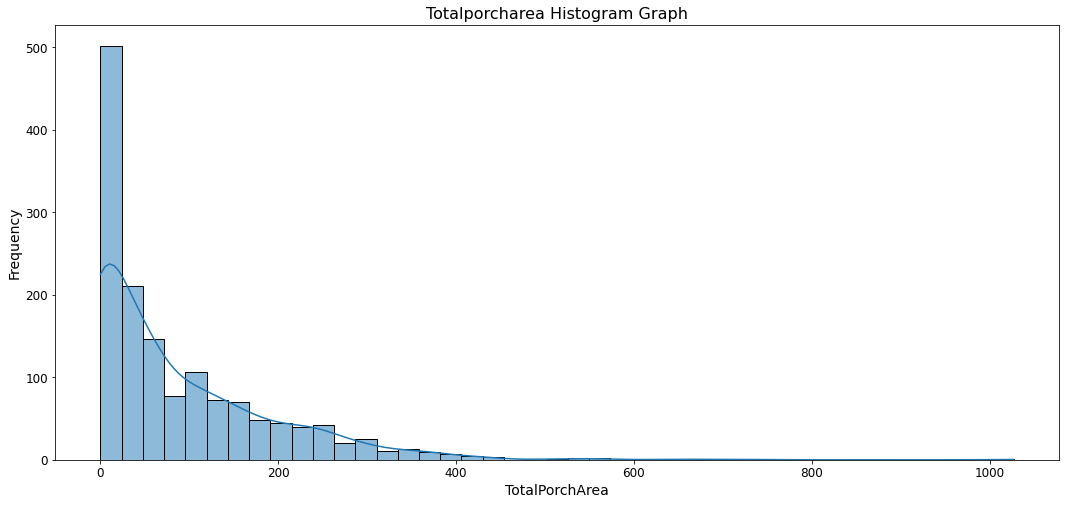

count    1460.000000
mean        2.126027
std         2.338815
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         2.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         4.000000
95%         6.000000
99%         8.000000
max        15.000000
Name: FireplaceScore, dtype: float64


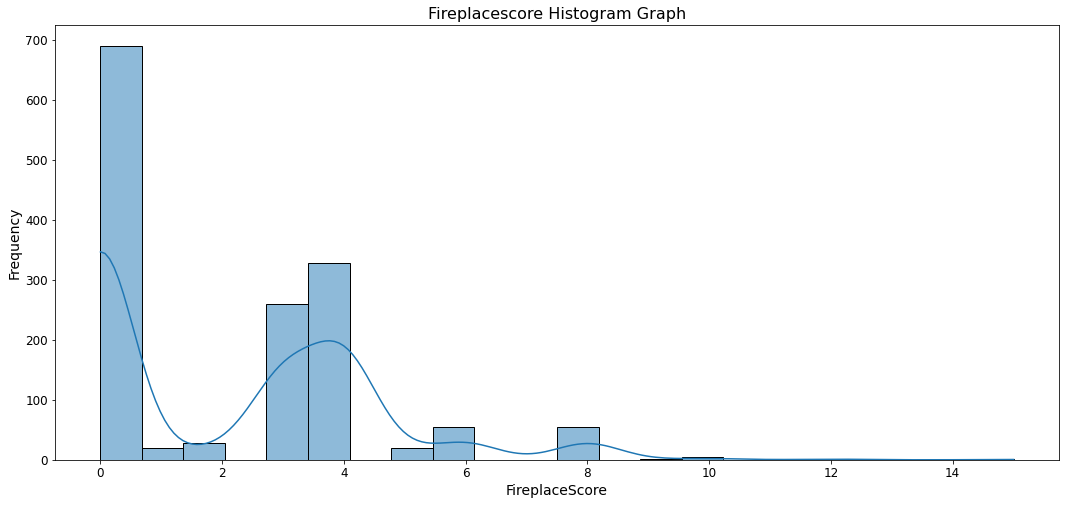

count     1460.000000
mean      1797.861644
std       2174.700918
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%        407.200000
50%       1084.000000
60%       1771.200000
70%       2501.200000
80%       3430.000000
90%       4935.900000
95%       6155.750000
99%       7755.350000
max      28220.000000
Name: BsmtFinScore, dtype: float64


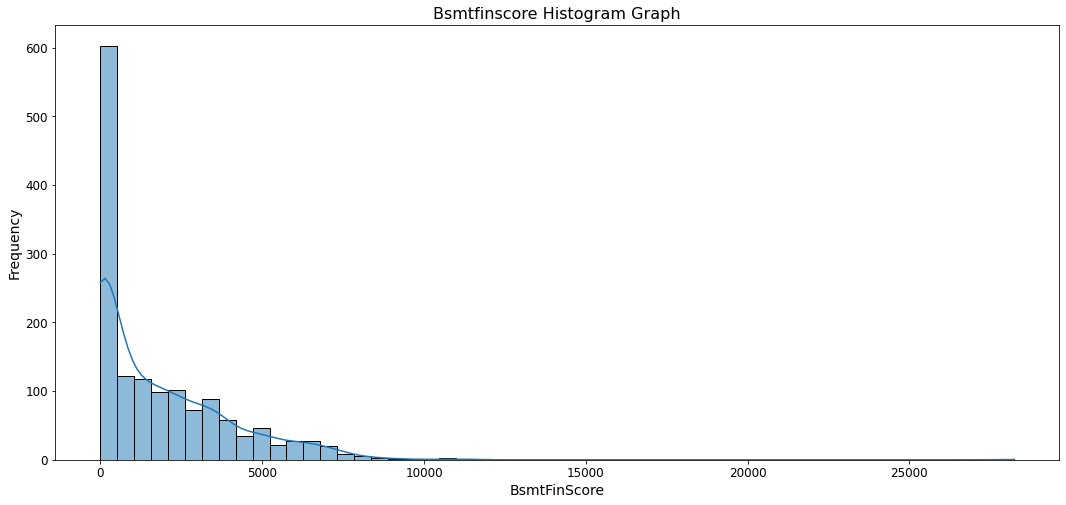

In [ ]:
for col in numerical_cols:
    num_summary(df, col, True)

*Identifying graph distribution*

In [ ]:
from scipy.stats import shapiro

# loop over all numerical columns
for col in numerical_cols:
    # perform Shapiro-Wilk test
    stat, p = shapiro(df[col])
    alpha = 0.05
    # check if p-value is greater than alpha
    if p > alpha:
        print(col, "is normally distributed (fail to reject H0)")
    else:
        print(col, "is not normally distributed (reject H0)")

MSSubClass is not normally distributed (reject H0)
LotFrontage is not normally distributed (reject H0)
LotArea is not normally distributed (reject H0)
YearRemodAdd is not normally distributed (reject H0)
MasVnrArea is not normally distributed (reject H0)
BsmtUnfSF is not normally distributed (reject H0)
GrLivArea is not normally distributed (reject H0)
BedroomAbvGr is not normally distributed (reject H0)
TotRmsAbvGrd is not normally distributed (reject H0)
GarageYrBlt is not normally distributed (reject H0)
WoodDeckSF is not normally distributed (reject H0)
MoSold is not normally distributed (reject H0)
SalePrice is not normally distributed (reject H0)
TotalBathrooms is not normally distributed (reject H0)
GarageCapacity is not normally distributed (reject H0)
TotalSF is not normally distributed (reject H0)
OverallScore is not normally distributed (reject H0)
Age is not normally distributed (reject H0)
BsmtOverall is not normally distributed (reject H0)
GarageOverall is not normally di

##3.2 Bivariate Analysis

**Checking correlation between higher correlated features**

In [ ]:
# Calculate the correlation matrix of the dataframe
corr = df.corr()

# Get the features that have an absolute correlation coefficient greater than 0.5 with the target variable SalePrice
high_corr_features = corr.index[abs(corr['SalePrice']) >= 0.4]

# Print the highly correlated features and the number of such features
print(f'Highly Correlated Features:\n', high_corr_features, '\n')
print(f'No. of Highly Correlated Features:', len(high_corr_features))

Highly Correlated Features:
 Index(['YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotRmsAbvGrd',
       'GarageYrBlt', 'SalePrice', 'TotalBathrooms', 'GarageCapacity',
       'TotalSF', 'OverallScore', 'Age', 'BsmtOverall', 'ExterOverall',
       'FireplaceScore', 'BsmtFinScore'],
      dtype='object') 

No. of Highly Correlated Features: 15


Text(105.0, 0.5, 'Features')

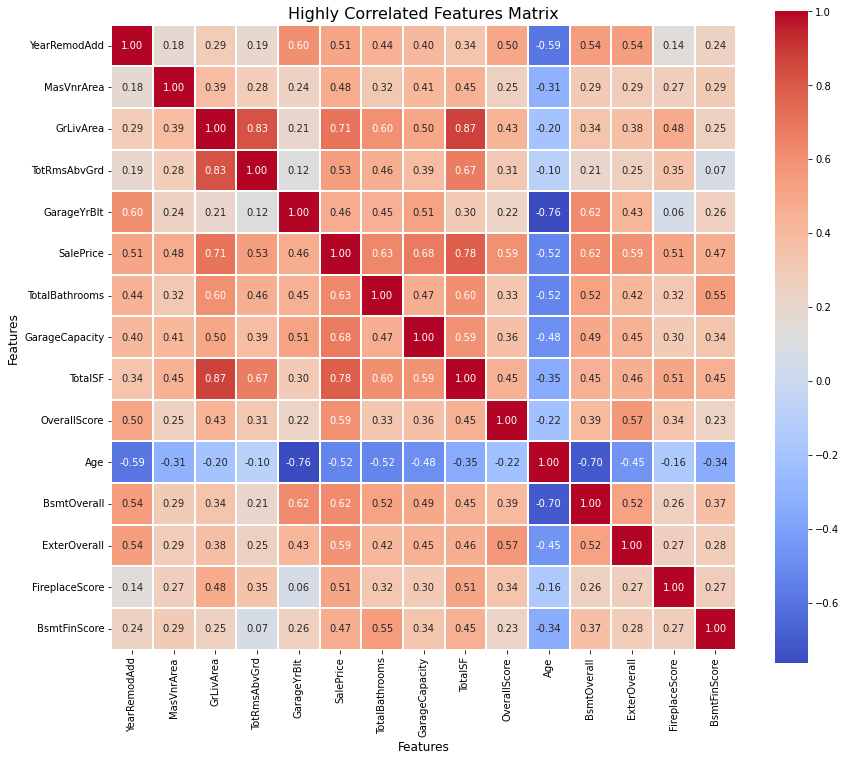

In [ ]:
# Create a heatmap to visualize the correlation matrix of the highly correlated features
plt.figure(figsize=(14,12))   # Set the figure size
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True, linewidths=2) # Generate the heatmap with the selected features
# Set the title and axis labels
plt.title('Highly Correlated Features Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)



In [ ]:
# Dropping the 'GrLivArea' feature as it has high correlation with 'TotalSF'
df.drop('GrLivArea', axis=1, inplace=True)

**Generating Scatter Plots**

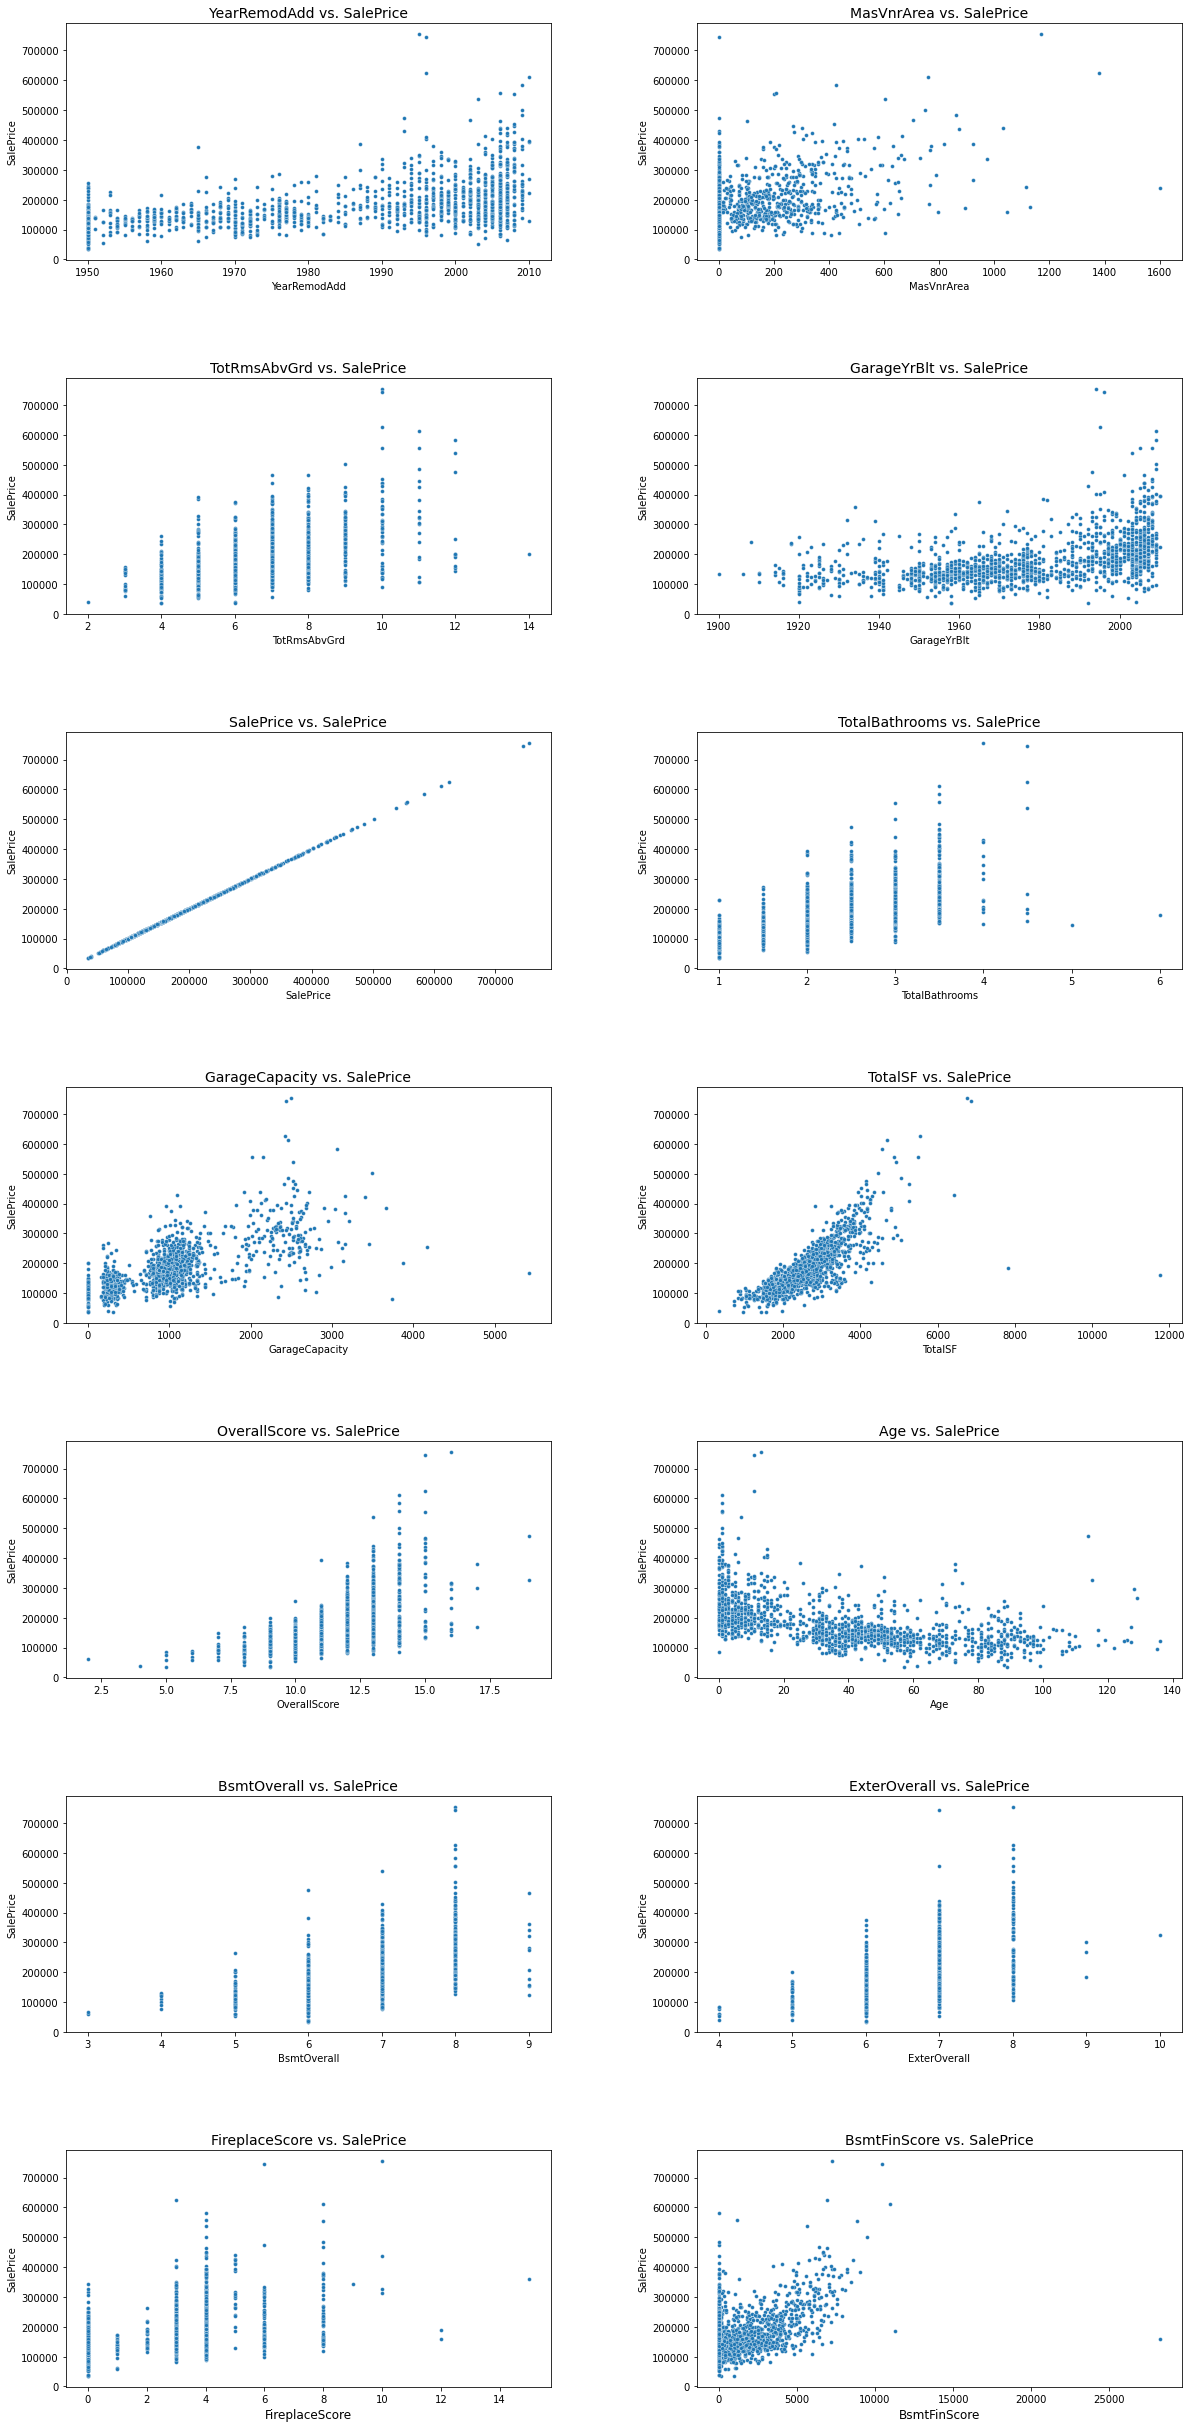

In [ ]:
# Create a list of highly numerical correlated features
features = list(high_corr_features)
features.remove("GrLivArea")
# Set the figure size and number of rows and columns of subplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 50))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot with SalePrice
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='SalePrice', data=df, ax=axes[i], s=15)
    axes[i].set_title(f"{feature} vs. SalePrice", fontsize=14)

    # Show only the x-axis label for the last row of subplots
    if i >= len(features)-2:
        axes[i].set_xlabel(feature, fontsize=12)

# Remove any extra plots
for ax in axes[len(features):]:
    ax.remove()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plots
plt.show()


# **4. MODEL IMPLEMENTATION**

## **4.1 Data Encoding**

In [ ]:
categorical_cols.remove("Utilities")
categorical_cols.remove("Street")
categorical_cols.remove("CentralAir")
print(categorical_cols)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
label_cols = ['LotShape', 'LandSlope', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageFinish']
one_hot_cols = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']

**Label Encoding**

In [ ]:
label_encoder = LabelEncoder() #Creating a label encoder object

df[label_cols] = df[label_cols].apply(label_encoder.fit_transform) # label encode all features in label_cols

**One Hot Encoding**

In [ ]:
# Perform one-hot encoding on the dataframe using the specified columns
df = pd.get_dummies(df, columns=one_hot_cols)

# Set the maximum number of columns to display to the number of columns in the dataframe
pd.set_option('display.max_columns', df.shape[1])

In [ ]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtUnfSF,HeatingQC,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,WoodDeckSF,MoSold,SalePrice,TotalBathrooms,GarageCapacity,TotalSF,OverallScore,Age,BsmtOverall,GarageOverall,ExterOverall,TotalPorchArea,FireplaceScore,BsmtFinScore,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Lvl,LandContour_Others,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Others,Condition2_Norm,Condition2_Others,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Others,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_Others,Electrical_Others,Electrical_SBrkr,Functional_Others,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_N,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,2003,196.0,3,150,0,3,2,8,2003.0,1,0,2,208500,3.5,1096,2566,12,5,7,6,7,61,0,3530,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,3,0,1976,0.0,1,284,0,3,3,6,1976.0,1,298,5,181500,2.5,920,2524,14,31,7,6,6,0,3,3912,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,0,0,2002,162.0,2,434,0,3,2,6,2001.0,1,0,9,223500,3.5,1216,2706,12,7,7,6,7,42,3,2430,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,0,0,1970,0.0,3,540,2,3,2,7,1998.0,2,0,2,140000,2.0,1926,2473,12,91,7,6,6,307,4,864,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0

In [ ]:
df.shape

(1460, 161)

## **4.2 Dataset Splitting**

In [ ]:
X = df.drop("SalePrice", axis = 1) # Creating a dataframe with only input features (independent variables)
y = df["SalePrice"] # Creating a dataframe with only the target variable (dependent variable)

# Splitting the data into training and testing datasets
# train_test_split() takes in the input features (X) and target variable (y) and splits them into training and testing datasets
# random_state = 0 ensures reproducibility of the split
# train_size = 0.8 specifies that 80% of the data should be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.8)

In [ ]:
X.head() #X only contains the input features

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtUnfSF,HeatingQC,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,WoodDeckSF,MoSold,TotalBathrooms,GarageCapacity,TotalSF,OverallScore,Age,BsmtOverall,GarageOverall,ExterOverall,TotalPorchArea,FireplaceScore,BsmtFinScore,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Lvl,LandContour_Others,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Others,Condition2_Norm,Condition2_Others,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Others,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_Others,Electrical_Others,Electrical_SBrkr,Functional_Others,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_N,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,2003,196.0,3,150,0,3,2,8,2003.0,1,0,2,3.5,1096,2566,12,5,7,6,7,61,0,3530,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,3,0,1976,0.0,1,284,0,3,3,6,1976.0,1,298,5,2.5,920,2524,14,31,7,6,6,0,3,3912,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,0,0,2002,162.0,2,434,0,3,2,6,2001.0,1,0,9,3.5,1216,2706,12,7,7,6,7,42,3,2430,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,0,0,1970,0.0,3,540,2,3,2,7,1998.0,2,0,2,2.0,1926,2473,12,91,7,6,6,307,4,864,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0

In [ ]:
y.head() #y only contains the target variable

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1168, 160)
X_test: (292, 160)
y_train: (1168,)
y_test: (292,)


## **4.3 Feature Scaling**

In [ ]:
# Initialize MinMaxScaler
sclr = MinMaxScaler()

# Fit and transform the training set using MinMaxScaler
X_train = sclr.fit_transform(X_train)

# Transform the test set using MinMaxScaler
X_test = sclr.transform(X_test)


## **4.4 Running Models**

In [ ]:
# Creating Lasso regression instance with a regularization parameter of 0.1 and max iterations of 20000
reg = Lasso(alpha=0.1, max_iter=20000)

# Fitting the model using the training samples
reg.fit(X_train, y_train)

# Making predictions using the testing samples
y_pred = reg.predict(X_test)

# Generating the R-squared value of the model
r2 = r2_score(y_test, y_pred)

# Generating the root mean squared error of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Displaying the RMSE and R-squared value on the screen
print("The R-squared value with Lasso regression is:", r2)
print("The root mean squared error with Lasso regression is:", rmse)


The R-squared value with Lasso regression is: 0.6331402559098528
The root mean squared error with Lasso regression is: 50333.670147519544


In [ ]:
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model on the training data
xgb_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_reg.predict(X_test)

# Calculate the root mean squared error (RMSE) and R-squared score of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the RMSE and R-squared score on the screen
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared score:', r2)

Root Mean Squared Error (RMSE): 38860.45168213344
R-squared score: 0.7813252948136815


In [ ]:
# Create instance of the Decision Tree Regressor model with random_state as 0
dt = DecisionTreeRegressor(random_state=0)

# Fit the model with training data
dt.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = dt.predict(X_test)

# Calculate the RMSE and R-squared for the predicted values and print them
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ", rmse)
print("R-squared: ", r2)

RMSE:  52704.86695083097
R-squared:  0.5977608817475084


In [ ]:
# Create a Random Forest Regressor instance
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on training data
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Calculate the root mean squared error (RMSE) and R-squared score of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the RMSE and R-squared score on the screen
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared score:', r2)

Root Mean Squared Error (RMSE): 35088.9546833271
R-squared score: 0.8217113393447093


In [ ]:
# Create an Elastic Net regressor
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0)

# Train the model on the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = elastic_net.predict(X_test)

# Calculate the root mean squared error (RMSE) and R-squared score of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the RMSE and R-squared score on the screen
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared score:', r2)


Root Mean Squared Error (RMSE): 44747.37565672247
R-squared score: 0.7100534128889445


## **4.5 Hyperparameter tuning**

In [ ]:
import warnings

# Define the parameter space for alpha and max_iter
param_dist = {'alpha': np.logspace(-4, 0, 20), 'max_iter': np.arange(1000, 30000, 500)}

# Create instance of the Lasso regression model with a higher max_iter value
lasso = Lasso(max_iter=50000)

# Create a random search object with 20 iterations
random_search = RandomizedSearchCV(lasso, param_distributions=param_dist, n_iter=20, random_state=0)

# Fit the random search object to the training data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

# Predict the target variable for test data using the best model
y_pred = random_search.predict(X_test)

# Calculate the Mean Squared Error (MSE), R-squared and Root Mean Squared Error (RMSE) for the predicted values and print them
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R-squared: ", r2)
print("RMSE: ", rmse)

Best hyperparameters:  {'max_iter': 28000, 'alpha': 0.615848211066026}
R-squared:  0.634344734969055
RMSE:  50250.97410848536


In [ ]:
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)

# Define the parameter grid to search over
param_grid = {'n_estimators': [1000, 1500],
              'learning_rate': [0.1, 0.15],
              'max_depth': [5, 7],
             }

# Create a grid search object
grid_search = GridSearchCV(xgb_reg, param_grid, scoring='neg_root_mean_squared_error')

# Train the grid search object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
# Use the best hyperparameters to train the model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',
                            n_estimators=best_params['n_estimators'],
                            learning_rate=best_params['learning_rate'],
                            max_depth=best_params['max_depth'],
                            n_jobs=-1)
xgb_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_reg.predict(X_test)

# Calculate the root mean squared error (RMSE) and R-squared score of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Display the RMSE, R-squared score, and best score on the screen
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared score:', r2)

Root Mean Squared Error (RMSE): 35592.72898142273
R-squared score: 0.816555186841827


In [ ]:
# Create a Random Forest Regressor instance
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Define the parameter grid to search over
param_grid = {'max_depth': [10, 20, 30],
              'max_features': [10, 20, 30],
              'min_samples_split': [2, 5, 10]
             }

# Create a Randomized Search object
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, random_state=0)

# Train the Randomized Search object on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to train the model
rf = RandomForestRegressor(n_estimators=100, random_state=0,
                            max_depth=best_params['max_depth'],
                            max_features=best_params['max_features'],
                            min_samples_split=best_params['min_samples_split'])

rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate the root mean squared error (RMSE) and R-squared score of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display the RMSE and R-squared score on the screen
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared score:', r2)

Root Mean Squared Error (RMSE): 35813.20175958596
R-squared score: 0.8142755161264392


In [ ]:
# Create instance of the Decision Tree Regressor model with random_state as 0
dt = DecisionTreeRegressor(random_state=0)

# Define the hyperparameters to tune
params = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}

# Create instance of RandomizedSearchCV with 10-fold cross-validation and 50 iterations
rs = RandomizedSearchCV(dt, params, n_iter=50, random_state=0)

# Fit the randomized search object with training data
rs.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", rs.best_params_)

# Use the best hyperparameters to train the model
dt = DecisionTreeRegressor(random_state=0, **rs.best_params_)
dt.fit(X_train, y_train)

# Predict the target variable for test data using the best hyperparameters
y_pred = dt.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) and R-squared for the predicted values and print them
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE: ", rmse)
print("R-squared: ", r2)


Best Hyperparameters:  {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 8}
RMSE:  43543.93873657295
R-squared:  0.7254393578520208


In [ ]:
# Define the parameter space for alpha and l1_ratio
param_dist = {'alpha': np.logspace(-4, 2, 20), 'l1_ratio': np.linspace(0.1, 0.9, 10)}

# Create instance of the ElasticNet regression model with a higher maximum number of iterations
elastic_net = ElasticNet(max_iter=50000, random_state=0)

# Create a random search object with 5-fold cross-validation
random_search = RandomizedSearchCV(elastic_net, param_distributions=param_dist, n_iter=20, random_state=0)

# Fit the random search object to the training data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

# Predict the target variable for test data using the best model
y_pred = random_search.predict(X_test)

# Calculate the Mean Squared Error (MSE), R-squared and Root Mean Squared Error (RMSE) for the predicted values and print them
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R-squared: ", r2)
print("RMSE: ", rmse)


Best hyperparameters:  {'l1_ratio': 0.3666666666666667, 'alpha': 0.0008858667904100823}
R-squared:  0.670839858455774
RMSE:  47677.358899530096
